In [911]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
import seaborn as sns
from seaborn import boxplot
from seaborn import violinplot
from seaborn import pairplot
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [912]:
def fetch_obesity_data():
    data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
    return data

obesity_data=fetch_obesity_data()

In [913]:
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [914]:
obesity_data.rename(columns = {"FAVC" : "Frequent consumption of high caloric food", "FCVC" : "Frequency of consumption of vegetables","NCP":"Number of main meals","CAEC":"Consumption of food between meals","SMOKE":"Smoke" ,"CH2O":"Consumption of water daily", "SCC":"Calories consumption monitoring","FAF":"Physical activity frequency","TUE": "Time using technology devices","CALC": "Consumption of alcohol", "MTRANS":"Transportation_used", "NObeyesdad": "Obesity Level"  }, inplace = True)

In [915]:
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used,Obesity Level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [916]:
obesity_data.shape

(2111, 17)

In [917]:
obesity_data.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


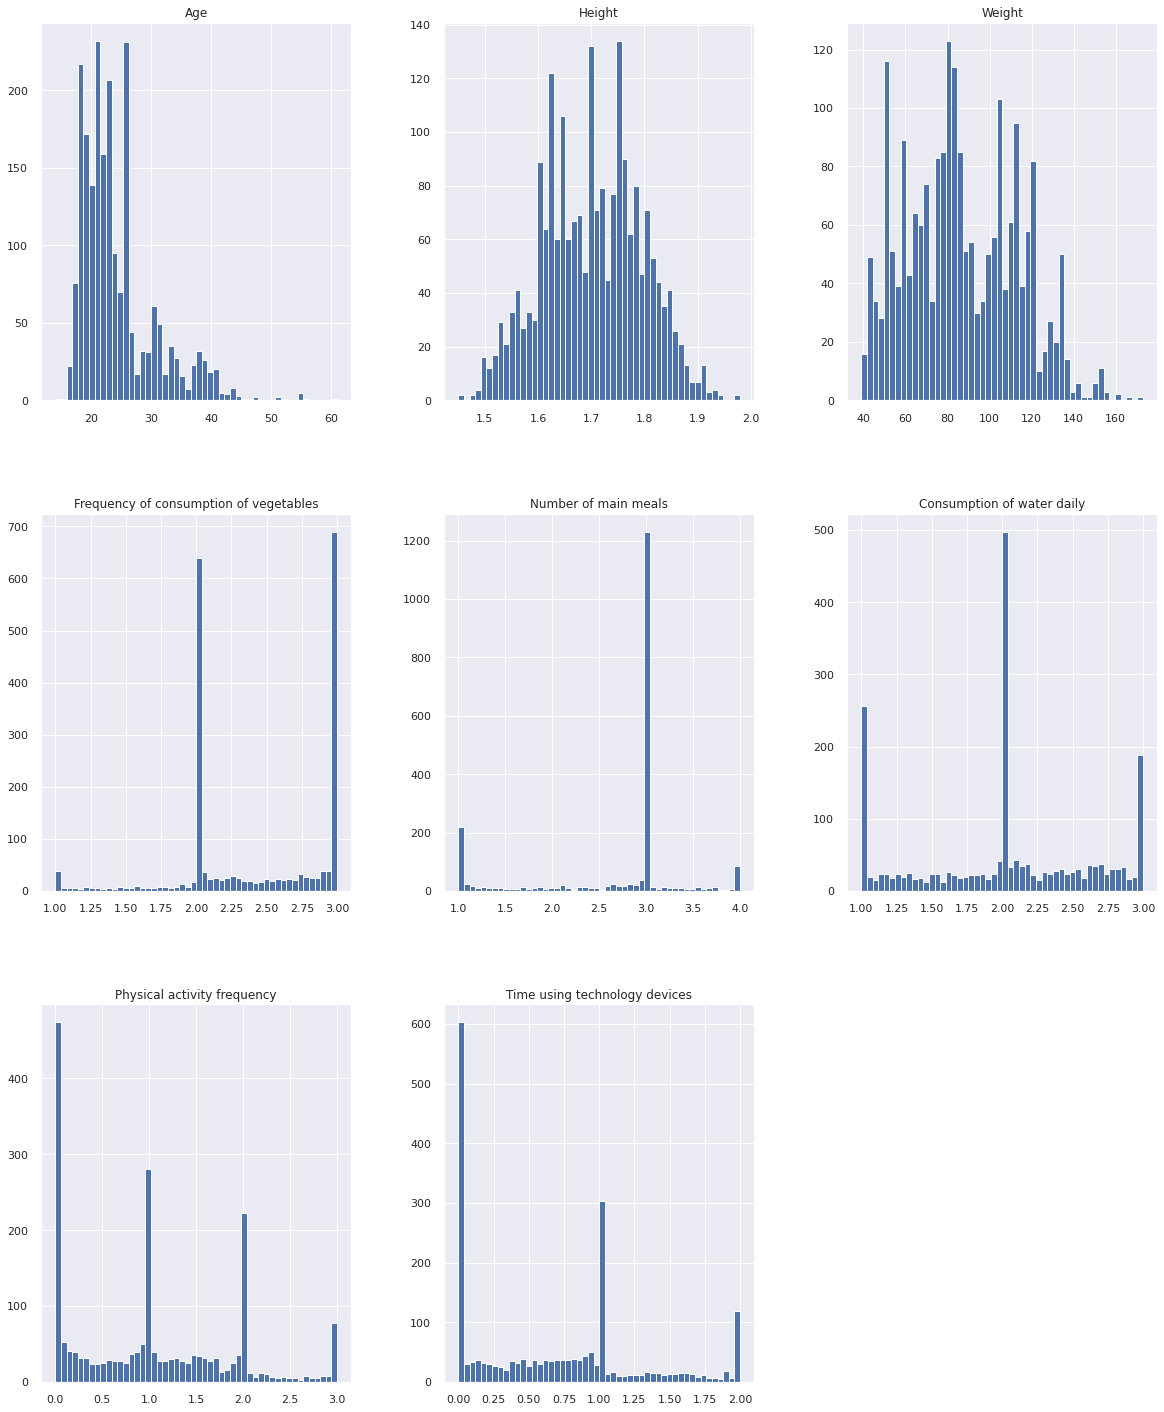

In [918]:
%matplotlib inline
import matplotlib.pyplot as plt
obesity_data.hist(bins=50, figsize=(20,25))
plt.show()

Height and Weight attributes are well distributed in our dataset.

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

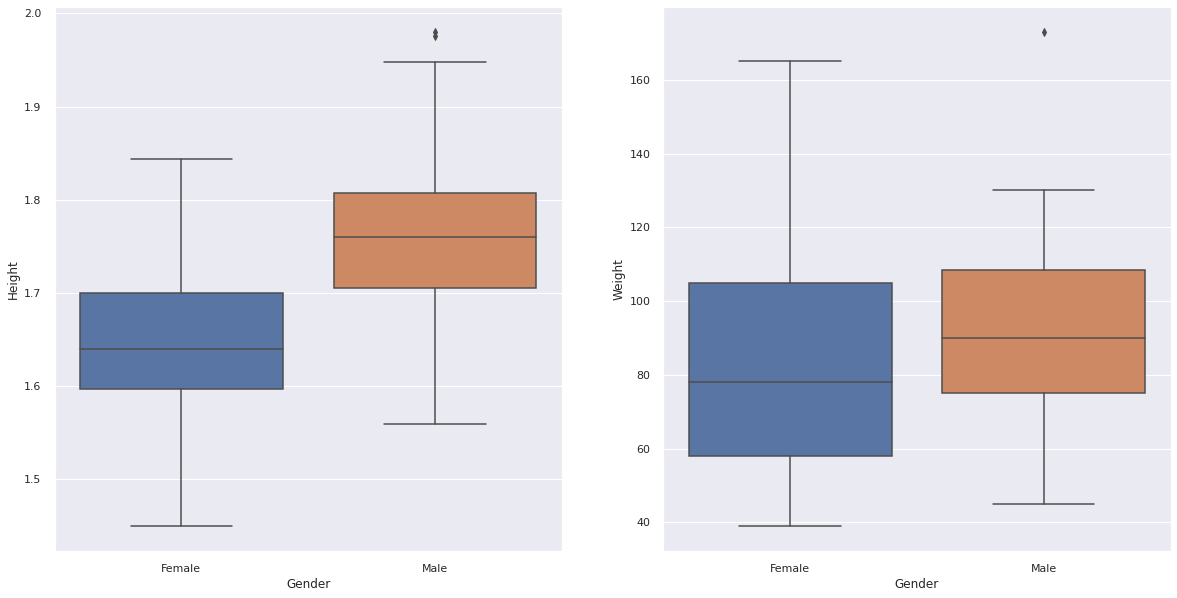

In [919]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=obesity_data)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=obesity_data)

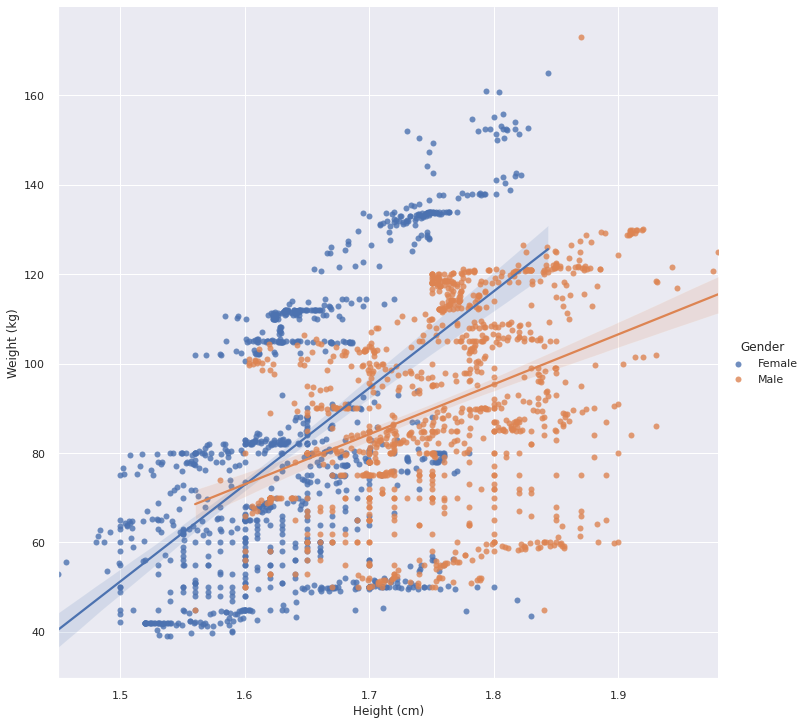

In [920]:
g = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=10, data=obesity_data)
g.set_axis_labels("Height (cm)", "Weight (kg)")

After performing some analysis using box plots and lmplot, it can be seen that the average weight of the Male gender is generally higher than the Female gender, whereas the average height is more or less similar. So, we need to be careful in designing the BMI levels for these 2 genders. So generally, for 2 similar weight and height values, the BMI for the Female Gender will higher than the Male Gender.

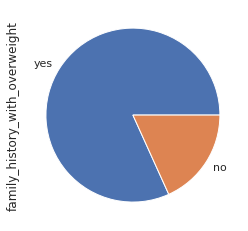

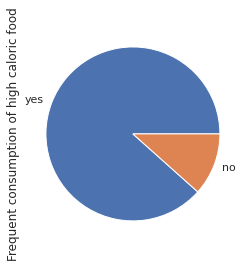

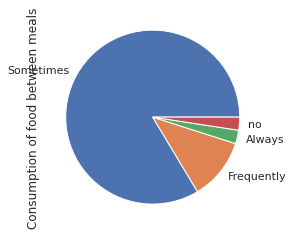

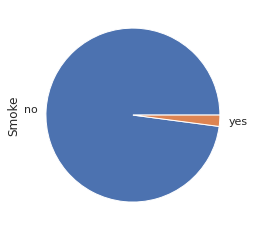

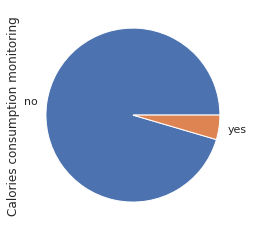

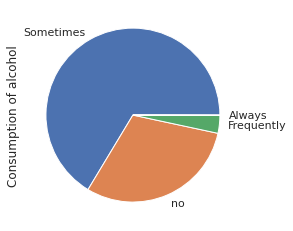

In [921]:
pie_plots=["family_history_with_overweight","Frequent consumption of high caloric food","Consumption of food between meals","Smoke","Calories consumption monitoring","Consumption of alcohol"]
for col in pie_plots:
    plt.figure()
    obesity_data[col].value_counts().plot.pie()

The above pie charts diplay how different values of the discrete attributes are spreadout.

<BarContainer object of 5 artists>

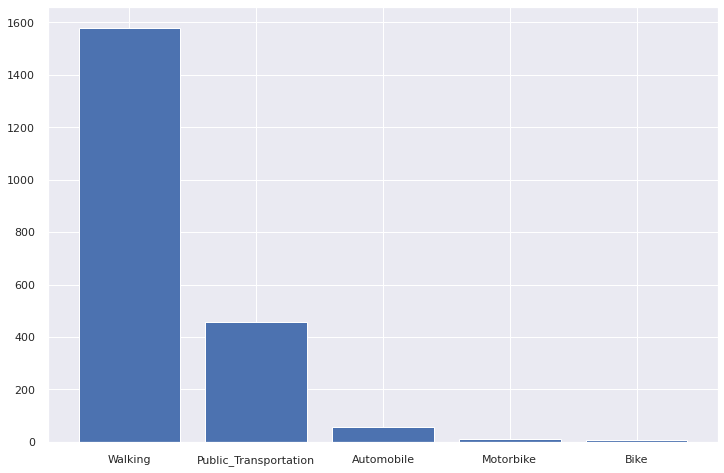

In [922]:
trans_var=["Walking","Public_Transportation","Automobile","Motorbike","Bike"]
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(trans_var, obesity_data["Transportation_used"].value_counts())

The above bar graph tells us about distribution of how different types of Transportation are utilized in the dataset. Higher value is for Walking, which has about 1550 entries, whereas other transportation modes have lesser entries. This would help us explain the impact of using Walking as a mode of transportation.

<BarContainer object of 7 artists>

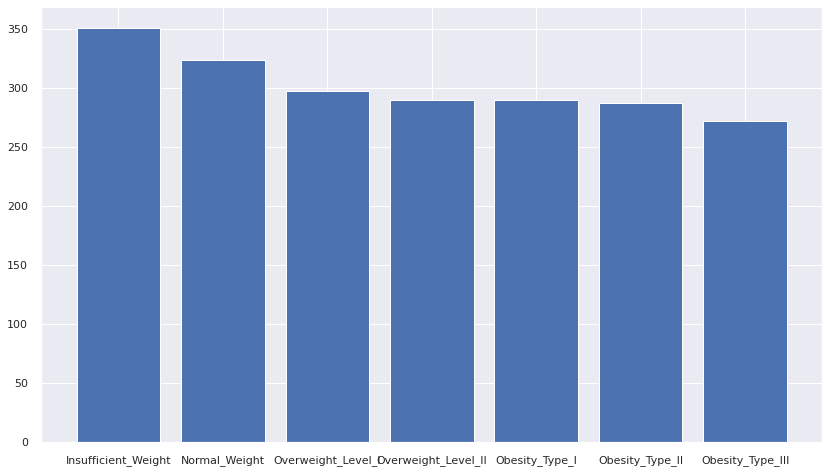

In [923]:
obesity_var=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
fig,ax=plt.subplots(figsize=(14,8))
plt.bar(obesity_var, obesity_data["Obesity Level"].value_counts())

After doing some exploratory data analysis, we come to know that one of the positives of our dataset is that the number of values for each class of obesity level is more or less similar in range. Such normally distributed labeled data helps us to provide more accuracy in predicting our output.

In [924]:
obesity_data["family_history_with_overweight"].replace({"yes": 1, "no": 0}, inplace=True)
obesity_data["Frequent consumption of high caloric food"].replace({"yes": 1, "no": 0}, inplace=True)
obesity_data["Calories consumption monitoring"].replace({"yes": 1, "no": 0}, inplace=True)
obesity_data["Smoke"].replace({"yes": 1, "no": 0}, inplace=True)
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used,Obesity Level
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


For features like family_history_with_overweight, Frequent consumption of high caloric food, calorie consumption monitoring, Smoke, we have only 2 possibilities: Yes and No. So, we could simply assign them with values of 1 for Yes and 0 for No.

In [925]:
ordinalencoder = OrdinalEncoder()
categories = pd.Categorical(obesity_data['Consumption of food between meals'], categories=['no', 'Sometimes', 'Frequently','Always'], ordered=True)
categories

['Sometimes', 'Sometimes', 'Sometimes', 'Sometimes', 'Sometimes', ..., 'Sometimes', 'Sometimes', 'Sometimes', 'Sometimes', 'Sometimes']
Length: 2111
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']

In [926]:
labels, unique = pd.factorize(categories, sort=True)
obesity_data['Consumption of food between meals'] = labels
obesity_data[['Consumption of food between meals']]=ordinalencoder.fit_transform(obesity_data[['Consumption of food between meals']])

In [927]:
categories = pd.Categorical(obesity_data["Consumption of alcohol"], categories=['no', 'Sometimes', 'Frequently','Always'], ordered=True)
labels, unique = pd.factorize(categories, sort=True)
obesity_data["Consumption of alcohol"] = labels
obesity_data[["Consumption of alcohol"]]=ordinalencoder.fit_transform(obesity_data[["Consumption of alcohol"]])
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used,Obesity Level
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,1.0,0,2.000000,0,0.000000,1.000000,0.0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,1.0,1,3.000000,1,3.000000,0.000000,1.0,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,1.0,0,2.000000,0,2.000000,1.000000,2.0,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,1.0,0,2.000000,0,2.000000,0.000000,2.0,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,1.0,0,2.000000,0,0.000000,0.000000,1.0,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,1.0,0,1.728139,0,1.676269,0.906247,1.0,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,1.0,0,2.005130,0,1.341390,0.599270,1.0,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,1.0,0,2.054193,0,1.414209,0.646288,1.0,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,1.0,0,2.852339,0,1.139107,0.586035,1.0,Public_Transportation,Obesity_Type_III


For attributes: Consumption of food between meals and Consumption of alcohol, we have attribute values as: Always, Frequently, Sometimes, and No. Now here we cannot use One Hot Encoding, because each of the above attributes has a level-based difference. So, we need to assign values like 3 for Always, 2 for Frequently, 1 for Sometimes, and 0 for No. This can be achieved through Ordinal Encoding. So, we use the OrdinalEncoder() library from sklearn.preprocessing to assign these values. By using the factorize function with sort=True, we get priority-based values.

In [928]:
obesity_data["Gender"] = pd.get_dummies(obesity_data.Gender, prefix='Gender')

In [929]:
t= pd.get_dummies(obesity_data["Transportation_used"], prefix='Transportation_used')

In [930]:
t

,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
2106,0,0,0,1,0
2107,0,0,0,1,0
2108,0,0,0,1,0
2109,0,0,0,1,0


For the remaining attribute- Transportation Used, we have used One Hot Encoding, as these values cannot be prioritized in any order.

In [931]:
new_obesity_data=pd.concat([obesity_data,t],axis=1, join="inner")
new_obesity_data=new_obesity_data.drop(['Transportation_used'], axis=1)
new_obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Obesity Level,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1.0,0,...,0,0.000000,1.000000,0.0,Normal_Weight,0,0,0,1,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1.0,1,...,1,3.000000,0.000000,1.0,Normal_Weight,0,0,0,1,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1.0,0,...,0,2.000000,1.000000,2.0,Normal_Weight,0,0,0,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1.0,0,...,0,2.000000,0.000000,2.0,Overweight_Level_I,0,0,0,0,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1.0,0,...,0,0.000000,0.000000,1.0,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1.0,0,...,0,1.676269,0.906247,1.0,Obesity_Type_III,0,0,0,1,0
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1.0,0,...,0,1.341390,0.599270,1.0,Obesity_Type_III,0,0,0,1,0
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1.0,0,...,0,1.414209,0.646288,1.0,Obesity_Type_III,0,0,0,1,0
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1.0,0,...,0,1.139107,0.586035,1.0,Obesity_Type_III,0,0,0,1,0


In [932]:
obese_categories=["Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
obese_count=0
for i in new_obesity_data["Obesity Level"]:
    if i in obese_categories:
        obese_count+=1
obese_count      

972

In [933]:
obese=[0]*13

obese_chars=["Family history","H. Caloric food","Vegetables","Meals","In between meals","Smoke","Water","Cal. monitor","Phy.activity","Tech devices time","Alcohol","Bike","Walking"]
for i in range(len(new_obesity_data["Obesity Level"])):
    if new_obesity_data["family_history_with_overweight"][i]==1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[0]+=1
    if new_obesity_data["Frequent consumption of high caloric food"][i]==1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[1]+=1
    if new_obesity_data["Frequency of consumption of vegetables"][i]==3 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[2]+=1
    if new_obesity_data["Number of main meals"][i]>=3 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[3]+=1
    if new_obesity_data["Consumption of food between meals"][i]>=2 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[4]+=1
    if new_obesity_data["Smoke"][i]==1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[5]+=1
    if new_obesity_data["Consumption of water daily"][i]>=2 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[6]+=1
    if new_obesity_data["Calories consumption monitoring"][i]==0 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[7]+=1
    if new_obesity_data["Physical activity frequency"][i]<=2 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[8]+=1
    if new_obesity_data["Time using technology devices"][i]>=1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[9]+=1
    if new_obesity_data["Consumption of alcohol"][i]!=0 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[10]+=1
    if new_obesity_data["Transportation_used_Bike"][i]!=1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[11]+=1
    if new_obesity_data["Transportation_used_Walking"][i]!=1 and new_obesity_data["Obesity Level"][i] in obese_categories:
        obese[12]+=1

print(obese)


print("The probability that a person with Family History as Overweight to be Obese is:",obese[0]/972)
print("The probability that a person with Frequent consumption of high caloric food to be Obese is:",obese[1]/972)
print("The probability that a person with Frequency of consumption of vegetables to be Obese is:",obese[2]/972)
print("The probability that a person with more than 3 main meals to be Obese is:",obese[3]/972)
print("The probability that a person with high frequency of food between meals to be Obese is:",obese[4]/972)
print("The probability that a person who Smokes to be Obese is:",obese[5]/972)
print("The probability that a person with Family History as Overweight to be Obese is:",obese[6]/972)
print("The probability that a person with Calories consumption monitoring to be Obese is:",obese[7]/972)
print("The probability that a person with Physical activity frequency to be Obese is:",obese[8]/972)
print("The probability that a person with high usage of time in technology devices to be Obese is:",obese[9]/972)
print("The probability that a person who consumes Alcohol to be Obese is:",obese[10]/972)
print("The probability that a person who doesn't use Transportation as biking to be Obese is:",obese[11]/972)
print("The probability that a person who doesn't use Transportation as walking to be Obese is:",obese[12]/972)

[964, 953, 376, 690, 16, 22, 615, 969, 923, 208, 735, 971, 969]
The probability that a person with Family History as Overweight to be Obese is: 0.9917695473251029
The probability that a person with Frequent consumption of high caloric food to be Obese is: 0.9804526748971193
The probability that a person with Frequency of consumption of vegetables to be Obese is: 0.3868312757201646
The probability that a person with more than 3 main meals to be Obese is: 0.7098765432098766
The probability that a person with high frequency of food between meals to be Obese is: 0.01646090534979424
The probability that a person who Smokes to be Obese is: 0.02263374485596708
The probability that a person with Family History as Overweight to be Obese is: 0.6327160493827161
The probability that a person with Calories consumption monitoring to be Obese is: 0.9969135802469136
The probability that a person with Physical activity frequency to be Obese is: 0.9495884773662552
The probability that a person with high

<BarContainer object of 13 artists>

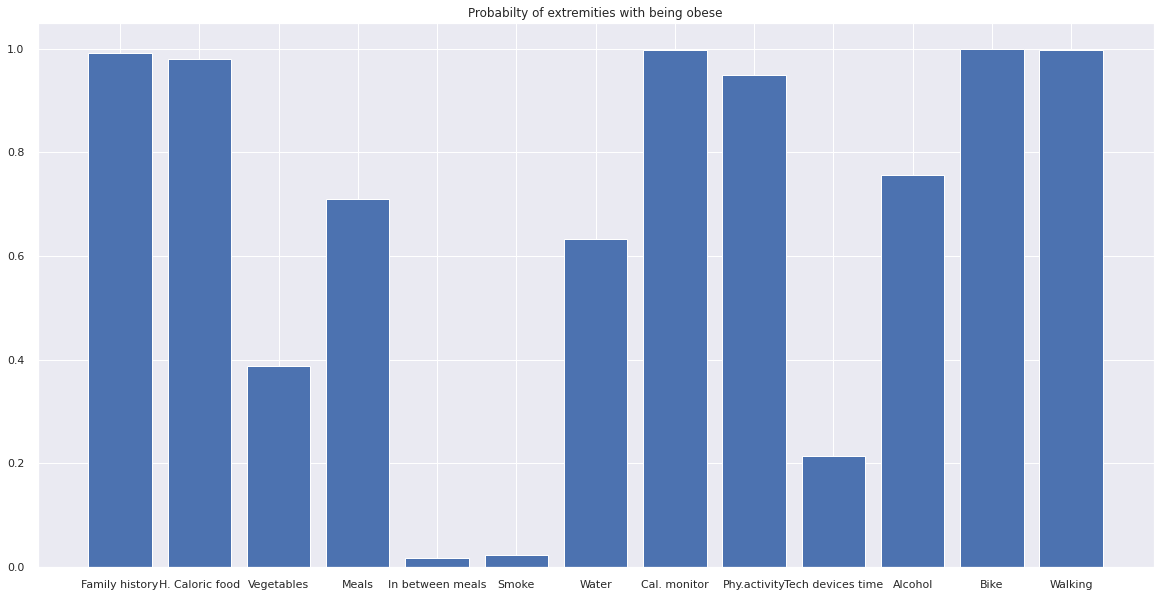

In [934]:
new_obese=[]
for i in obese:
    i=i/972
    new_obese.append(i)
new_obese

fig,ax=plt.subplots(figsize=(20,10))
ax.set_title("Probabilty of extremities with being obese")
plt.bar(obese_chars,new_obese)

In this analysis, we have taken all the people for the dataset which are in Obese Categories: I, II and III, and then we have taken the extreme values for each attribute initially, like Yes for Family History with Overweight, Smoking towards the negative side. For instance Smoking is set to “Yes” as it shouldn’t be done, whereas Calorie Consumption Monitoring has been set to “No”. However, the problem with this analysis is that it largely depends on the number of extremities in the data. For instance, if we consider Family History with Overweight, most of the samples present in the dataset have a value of "Yes", so it automatically gives an extreme probability of 99.17%. Also, the number of samples where the transportation used as Biking is very low, so we can't provide any firm conclusion toward our prediction with this, but we do get a fair idea.

In [935]:
categories = pd.Categorical(new_obesity_data["Obesity Level"], categories=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], ordered=True)
labels, unique = pd.factorize(categories, sort=True)
new_obesity_data["Obesity Level"] = labels
new_obesity_data[["Obesity Level"]]=ordinalencoder.fit_transform(new_obesity_data[["Obesity Level"]])
new_obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Obesity Level,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1.0,0,...,0,0.000000,1.000000,0.0,1.0,0,0,0,1,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1.0,1,...,1,3.000000,0.000000,1.0,1.0,0,0,0,1,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1.0,0,...,0,2.000000,1.000000,2.0,1.0,0,0,0,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1.0,0,...,0,2.000000,0.000000,2.0,2.0,0,0,0,0,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1.0,0,...,0,0.000000,0.000000,1.0,3.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1.0,0,...,0,1.676269,0.906247,1.0,6.0,0,0,0,1,0
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1.0,0,...,0,1.341390,0.599270,1.0,6.0,0,0,0,1,0
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1.0,0,...,0,1.414209,0.646288,1.0,6.0,0,0,0,1,0
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1.0,0,...,0,1.139107,0.586035,1.0,6.0,0,0,0,1,0


We have also used Ordinal Encoding for Obesity levels, i.e., 0.0 for Insufficient Weight, 1.0 for Normal weight, 2.0 for Overweight Level I, 3.0 for Overweight Level II, 4.0 for Obesity Type I, 5.0 for Obesity Type II, and 6.0 for Obesity Type III.

In [936]:
X=new_obesity_data[["Gender","Age","Height","Weight","family_history_with_overweight","Frequent consumption of high caloric food","Frequency of consumption of vegetables","Number of main meals","Consumption of food between meals","Smoke","Consumption of water daily","Calories consumption monitoring","Physical activity frequency","Time using technology devices","Consumption of alcohol","Transportation_used_Automobile","Transportation_used_Bike","Transportation_used_Motorbike","Transportation_used_Public_Transportation","Transportation_used_Walking"]]
y=new_obesity_data[["Obesity Level"]]

For our 1st research question, we have set Label as Obesity Level, whereas all other attributes for evaluation.

In [937]:
min_max_scaler = MinMaxScaler()
normalized_obesity_data=X.copy()
normalized_obesity_data[["Gender","Age","Height","Weight","family_history_with_overweight","Frequent consumption of high caloric food","Frequency of consumption of vegetables","Number of main meals","Consumption of food between meals","Smoke","Consumption of water daily","Calories consumption monitoring","Physical activity frequency","Time using technology devices","Consumption of alcohol","Transportation_used_Automobile","Transportation_used_Bike","Transportation_used_Motorbike","Transportation_used_Public_Transportation","Transportation_used_Walking"]]=min_max_scaler.fit_transform(new_obesity_data[["Gender","Age","Height","Weight","family_history_with_overweight","Frequent consumption of high caloric food","Frequency of consumption of vegetables","Number of main meals","Consumption of food between meals","Smoke","Consumption of water daily","Calories consumption monitoring","Physical activity frequency","Time using technology devices","Consumption of alcohol","Transportation_used_Automobile","Transportation_used_Bike","Transportation_used_Motorbike","Transportation_used_Public_Transportation","Transportation_used_Walking"]])
normalized_obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,1.0,0.0
1,1.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.333333,1.0,1.000000,1.0,1.000000,0.000000,0.333333,0.0,0.0,0.0,1.0,0.0
2,0.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.666667,0.500000,0.666667,0.0,0.0,0.0,1.0,0.0
3,0.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.333333,0.0,0.500000,0.0,0.666667,0.000000,0.666667,0.0,0.0,0.0,0.0,1.0
4,0.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.333333,0.0,0.500000,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.148443,0.491943,0.689616,1.0,1.0,1.0,0.666667,0.333333,0.0,0.364069,0.0,0.558756,0.453123,0.333333,0.0,0.0,0.0,1.0,0.0
2107,1.0,0.169850,0.563366,0.707037,1.0,1.0,1.0,0.666667,0.333333,0.0,0.502565,0.0,0.447130,0.299635,0.333333,0.0,0.0,0.0,1.0,0.0
2108,1.0,0.181362,0.570200,0.706637,1.0,1.0,1.0,0.666667,0.333333,0.0,0.527097,0.0,0.471403,0.323144,0.333333,0.0,0.0,0.0,1.0,0.0
2109,1.0,0.220467,0.546132,0.704079,1.0,1.0,1.0,0.666667,0.333333,0.0,0.926169,0.0,0.379702,0.293018,0.333333,0.0,0.0,0.0,1.0,0.0


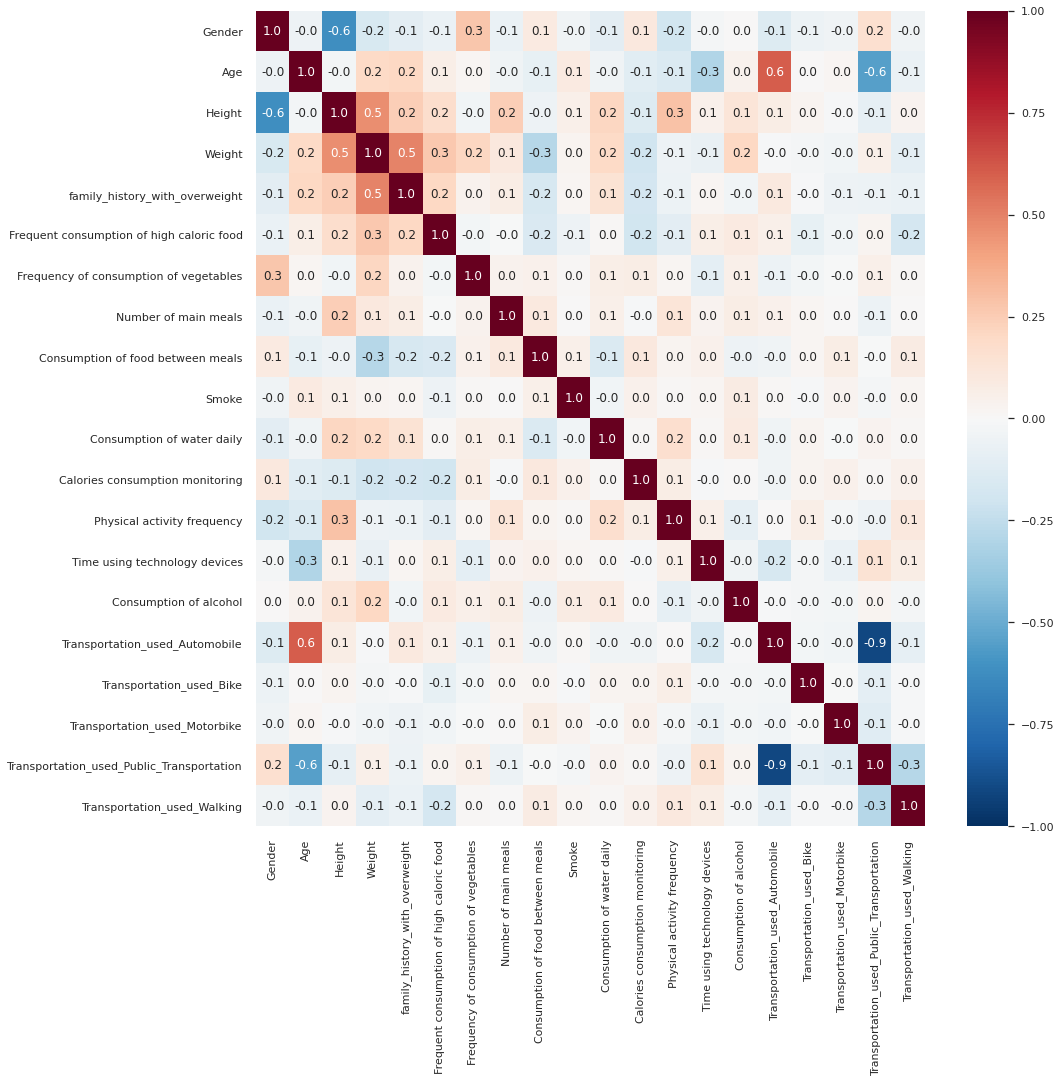

In [938]:
from seaborn import heatmap
fig,ax=plt.subplots(figsize=(15,15))
ax=heatmap(normalized_obesity_data.corr(),fmt=".1f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1)

The Correlation Matrix shows that there are very values which are correlated to each other. Almost all values are not related to each other.

<AxesSubplot:>

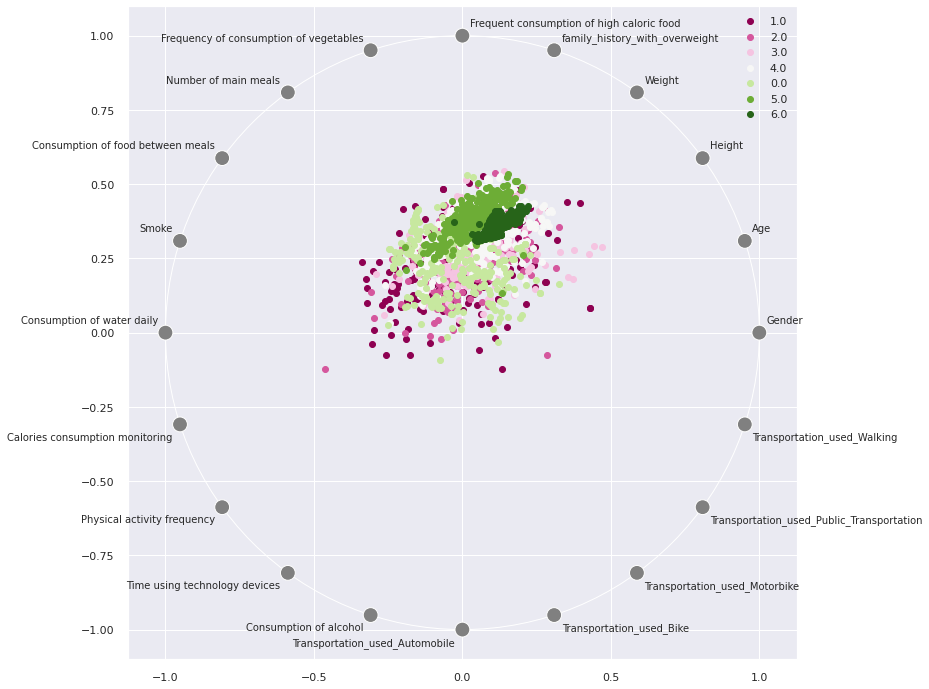

In [939]:
from pandas.plotting import radviz
fig,ax=plt.subplots(figsize=(12,12))
new_df=normalized_obesity_data.copy()
new_df["Obesity Level"]=y
radviz(new_df,"Obesity Level",ax=ax,colormap="PiYG")

The Radviz plot helps us to find out how closely related the features are for each of the Obesity Level. It can be observed that the values are more closely related in case of higher values of obesity and for they are scattered further in case of Normal and Insufficient Weight.

[Text(0, 0, 'Gender'),
 Text(1, 0, 'Age'),
 Text(2, 0, 'Height'),
 Text(3, 0, 'Weight'),
 Text(4, 0, 'family_history_with_overweight'),
 Text(5, 0, 'Frequent consumption of high caloric food'),
 Text(6, 0, 'Frequency of consumption of vegetables'),
 Text(7, 0, 'Number of main meals'),
 Text(8, 0, 'Consumption of food between meals'),
 Text(9, 0, 'Smoke'),
 Text(10, 0, 'Consumption of water daily'),
 Text(11, 0, 'Calories consumption monitoring'),
 Text(12, 0, 'Physical activity frequency'),
 Text(13, 0, 'Time using technology devices'),
 Text(14, 0, 'Consumption of alcohol'),
 Text(15, 0, 'Transportation_used_Automobile'),
 Text(16, 0, 'Transportation_used_Bike'),
 Text(17, 0, 'Transportation_used_Motorbike'),
 Text(18, 0, 'Transportation_used_Public_Transportation'),
 Text(19, 0, 'Transportation_used_Walking')]

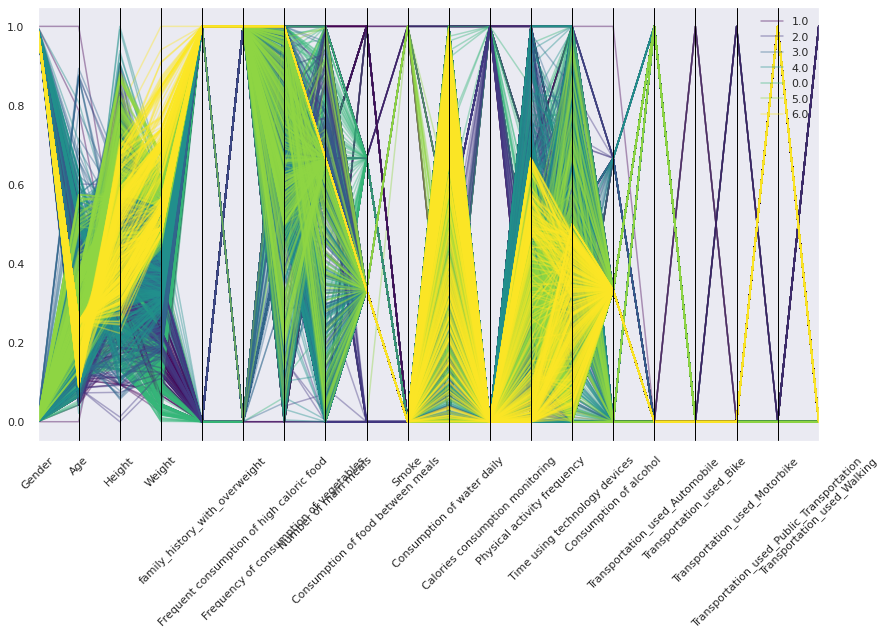

In [940]:
from pandas.plotting import parallel_coordinates
fig,ax=plt.subplots(figsize=(14,8))
parallel_coordinates(new_df,"Obesity Level",ax=ax,colormap="viridis",alpha=0.4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


The parallel coordinates plot helps us decide which feature decides more impact for each of the Obesity levels. We need to use Normalized data in this case to give a more accurate display of feature impact. For very high obesity level, it can be seen that Weight, Consumption of Food between meals, Daily Consumption of Water Daily and Mode of transportation have a very high impact. For several overweight values, we family history with overweight and Frequent Consumption of High Caloric Food, Physical Activity Frequency and Time using Technology Devices seem to have high impact. 

# 1. OBESITY LEVEL ESTIMATION USING MULTICLASS CLASSIFICATION

In [941]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

We split the dataset into 80% training and 20% test dataset using train_test_split.

In [942]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [943]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1,21.000000,1.630000,60.000000,1,1,3.000000,3.000000,3.0,1,2.000000,0,2.000000,0.000000,1.0,0,0,0,1,0
1,1,20.924956,1.752531,133.618706,1,1,3.000000,3.000000,1.0,0,2.887659,0,1.480919,0.779641,1.0,0,0,0,1,0
2,1,22.899740,1.661715,82.595793,1,1,1.203754,1.355354,1.0,0,2.765593,0,0.128342,1.659476,1.0,0,0,0,1,0
3,1,21.837996,1.588046,44.236067,0,0,3.000000,1.696080,2.0,0,2.550307,0,1.098862,0.000000,0.0,0,0,0,1,0
4,0,25.994746,1.811602,106.042142,1,1,3.000000,3.000000,1.0,0,2.858171,0,1.813318,0.680215,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,1.0,0,2.530035,0,0.955317,1.339232,1.0,1,0,0,0,0
1684,0,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,1.0,0,1.400247,0,0.887923,1.011983,1.0,0,0,0,1,0
1685,1,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,1.0,0,2.000000,0,0.146919,2.000000,0.0,0,0,0,1,0
1686,1,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,1.0,0,2.010596,0,0.851059,0.630866,0.0,0,0,0,1,0


In [944]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1,20.406871,1.755978,53.699561,1,1,2.000000,3.891994,2.0,0,1.863930,0,2.870127,2.000000,0.0,0,0,0,1,0
1,1,26.000000,1.624950,111.004920,1,1,3.000000,3.000000,1.0,0,2.704315,0,0.000000,0.322666,1.0,0,0,0,1,0
2,0,18.000000,1.850000,60.000000,1,1,3.000000,4.000000,1.0,0,2.000000,1,2.000000,0.000000,1.0,1,0,0,0,0
3,1,21.000000,1.520000,42.000000,0,1,3.000000,1.000000,2.0,0,1.000000,0,0.000000,0.000000,1.0,0,0,0,1,0
4,0,22.000000,1.750000,74.000000,1,0,2.000000,3.000000,1.0,0,2.000000,0,1.000000,2.000000,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,19.000000,1.800000,87.000000,1,1,2.000000,4.000000,1.0,0,2.000000,0,2.000000,1.000000,1.0,0,0,0,1,0
419,0,30.715160,1.650189,101.141277,1,1,2.913452,2.269799,1.0,0,1.000000,0,1.889937,0.378818,0.0,0,0,0,1,0
420,0,19.000000,1.850000,65.000000,1,0,2.000000,3.000000,1.0,0,3.000000,0,2.000000,1.000000,1.0,0,1,0,0,0
421,0,28.986237,1.758618,113.501549,1,1,2.320201,3.000000,1.0,0,2.164784,0,0.000000,1.465479,1.0,1,0,0,0,0


In [945]:
y_train

,Obesity Level
0,1.0
1,6.0
2,4.0
3,0.0
4,4.0
...,...
1683,5.0
1684,3.0
1685,3.0
1686,4.0


In [946]:
y_test

,Obesity Level
0,0.0
1,6.0
2,0.0
3,0.0
4,1.0
...,...
418,2.0
419,5.0
420,1.0
421,5.0


In [947]:
from yellowbrick.classifier import ClassificationReport

def create_Classification_Report(classifier):
    
    fig,ax=plt.subplots(figsize=(8,5))
    cm_viz=ClassificationReport(classifier,classes=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"])
    cm_viz.score(X_test,np.ravel(y_test))
    cm_viz.poof()

The classification report is used to evaluate the Precision, Recall and f1 scores for each of the classifiers.

In [948]:
from yellowbrick.classifier import ConfusionMatrix

def create_Confusion_Matrix(classifier):
    
    fig,ax=plt.subplots(figsize=(8,5))
    cm_viz1=ConfusionMatrix(classifier,classes=["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"])
    cm_viz1.score(X_test,np.ravel(y_test))
    cm_viz1.poof()

The confusion_matrix is used to evaluate the True Positives, True Negatives, False Positives, False Negatives for all the classifiers.

In [949]:
from yellowbrick.model_selection import FeatureImportances

def feature_importance(classifier,X,y):

    fig,ax=plt.subplots(figsize=(10,6))
    fi_viz=FeatureImportances(classifier)
    fi_viz.fit(X,y)
    fi_viz.poof()

The feature importances module is used to identify which features will be largely affecting the classifier output. This feature will be used to estimate the key indicators of obesity.

In [950]:
accuracy_scores=[]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,np.ravel(y_train))
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.8888888888888888

We began with K Nearest Neighbor Classification using the value of K as 5. This gave us an accuracy of 88%, which is decent, but when we discuss about a health concern, it is essential to have more accuracy.

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


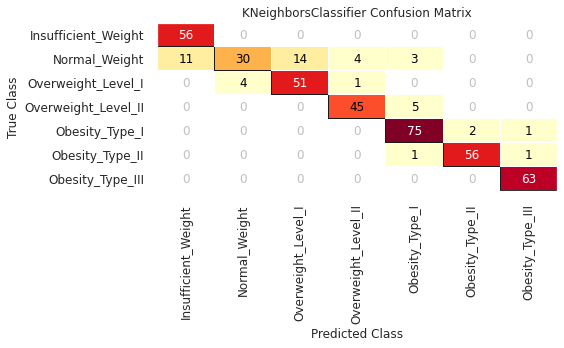

In [951]:
create_Confusion_Matrix(knn)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


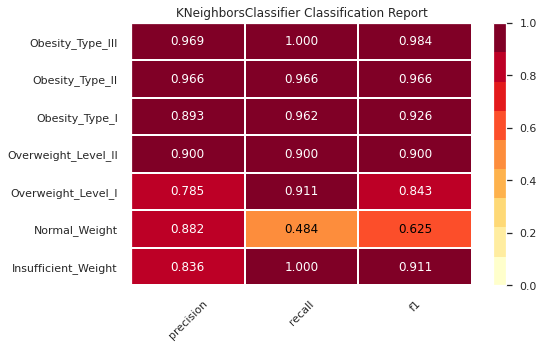

In [952]:
create_Classification_Report(knn)

In [953]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',gamma=5, C = 1).fit(X_train, np.ravel(y_train))
y_pred = svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.8936170212765957

Next, we went with Support Vector Machine Classifier with Linear Kernel. This only give us a slight increase in accuracy of 89.36%.

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


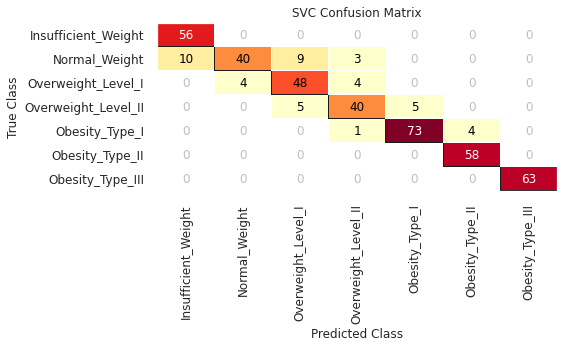

In [954]:
create_Confusion_Matrix(svm)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


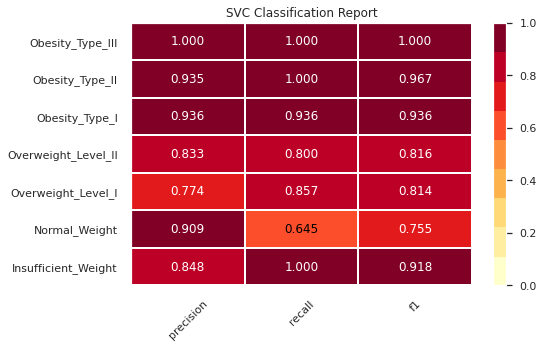

In [955]:
create_Classification_Report(svm)

In [956]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.9385342789598109

The decision tree classifier gives us 93.85% accuracy with random_state value of 42.

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


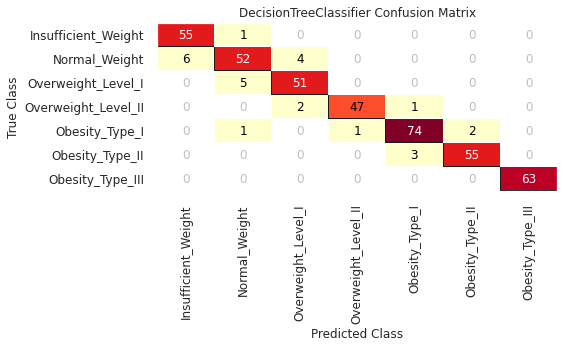

In [957]:
create_Confusion_Matrix(dt)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


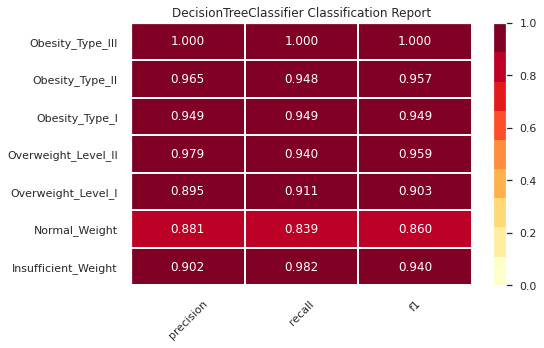

In [958]:
create_Classification_Report(dt)

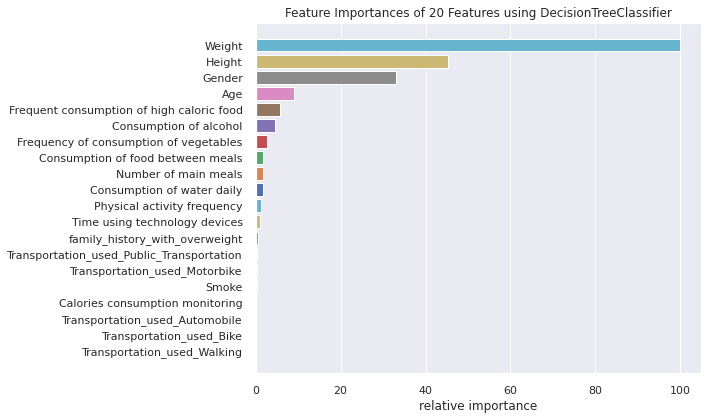

In [959]:
feature_importance(dt,X_train,y_train)

The feature importances gives information about the gini importance values.

In [960]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,np.ravel(y_train))
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.9550827423167849

The RandomForestClassifier gives us an accuracy of 95.5% with random state value of 42.

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


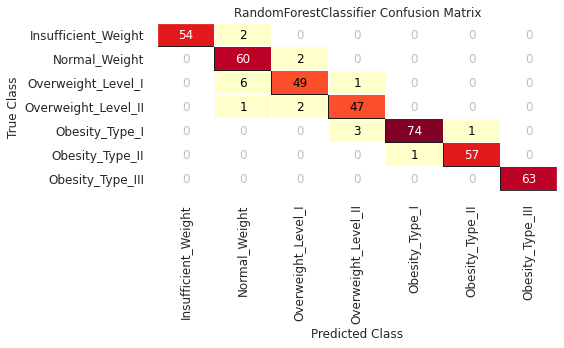

In [961]:
create_Confusion_Matrix(rf)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


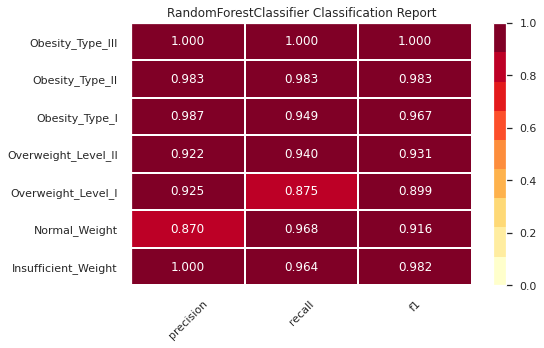

In [962]:
create_Classification_Report(rf)

In [963]:
import rfpimp
imp=rfpimp.importances(rf,X_test,y_test)
imp

,Importance
Feature,
Weight,0.562648
Height,0.080378
Age,0.075650
Gender,0.040189
Frequency of consumption of vegetables,0.021277
family_history_with_overweight,0.011820
Time using technology devices,0.009456
Number of main meals,0.009456
Transportation_used_Public_Transportation,0.007092


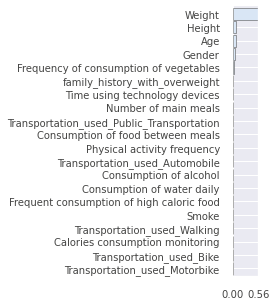

In [964]:
from rfpimp import *
viz = plot_importances(imp)
viz.view()

In [966]:
import xgboost as xgb
xgb_class=xgb.XGBClassifier(random_state=42)
xgb_class.fit(X_train,np.ravel(y_train),early_stopping_rounds=10,eval_set=[(X_test,y_test)],eval_metric="mlogloss")
y_pred=xgb_class.predict(X_test[:])

[0]	validation_0-mlogloss:1.24955
[1]	validation_0-mlogloss:0.95224
[2]	validation_0-mlogloss:0.76202
[3]	validation_0-mlogloss:0.62582
[4]	validation_0-mlogloss:0.52903
[5]	validation_0-mlogloss:0.45088
[6]	validation_0-mlogloss:0.39748
[7]	validation_0-mlogloss:0.35247
[8]	validation_0-mlogloss:0.31865
[9]	validation_0-mlogloss:0.29324
[10]	validation_0-mlogloss:0.27006
[11]	validation_0-mlogloss:0.24995
[12]	validation_0-mlogloss:0.23770
[13]	validation_0-mlogloss:0.22008
[14]	validation_0-mlogloss:0.21136
[15]	validation_0-mlogloss:0.20005
[16]	validation_0-mlogloss:0.19402
[17]	validation_0-mlogloss:0.18591
[18]	validation_0-mlogloss:0.18171
[19]	validation_0-mlogloss:0.17500
[20]	validation_0-mlogloss:0.16929
[21]	validation_0-mlogloss:0.16281
[22]	validation_0-mlogloss:0.16148
[23]	validation_0-mlogloss:0.15683
[24]	validation_0-mlogloss:0.15558
[25]	validation_0-mlogloss:0.15233
[26]	validation_0-mlogloss:0.15197
[27]	validation_0-mlogloss:0.14899
[28]	validation_0-mlogloss:0.1

The XGBoost Algorithm creates a weak tree and then boosts the subsequent trees to reduce the residual errors. It also to capture and address any patterns in the errors until they start looking as if they are random. They also have great Runtime efficiency, help to prevent overfitting and also most notably help us with Feature Importance. Use of GPUs can enhance its performance.

In [967]:
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.950354609929078

The XGBoost algorithm gives an accuracy of 95%.

/home/chaitanya/anaconda3/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


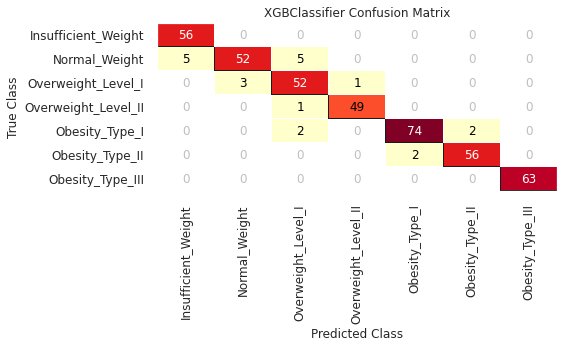

In [968]:
create_Confusion_Matrix(xgb_class)

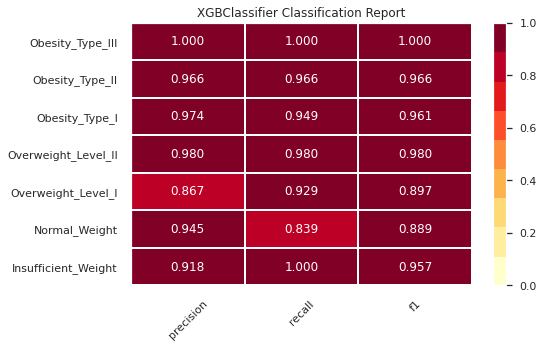

In [969]:
create_Classification_Report(xgb_class)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

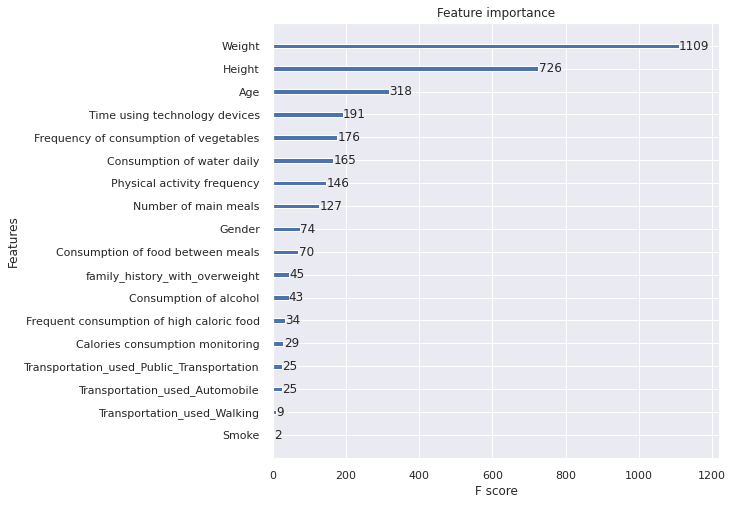

In [970]:
fig,ax=plt.subplots(figsize=(8,8))
xgb.plot_importance(xgb_class,ax=ax)

In [971]:
import lightgbm as lgb
lgbm_class=lgb.LGBMClassifier(random_state=42,num_leaves=30)
lgbm_class.fit(X_train,np.ravel(y_train))
y_pred=lgbm_class.predict(X_test[:])
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.9716312056737588

The Light Gradient Boosting Machine Algorithm uses a sampling mechanism to deal with continuous values, which helps us creating trees more quickly than XGBoost algorithm and also helps us with lesser memory usage.

The LGBM also grows trees depth first, i.e. leaf wise and not level wise. We use num_leaves parameter to control overfitting.

The Light Gradient Boosting Machine Algorithm gives us an accuracy of 97.16%. So it is the best model for classifying the obesity level.

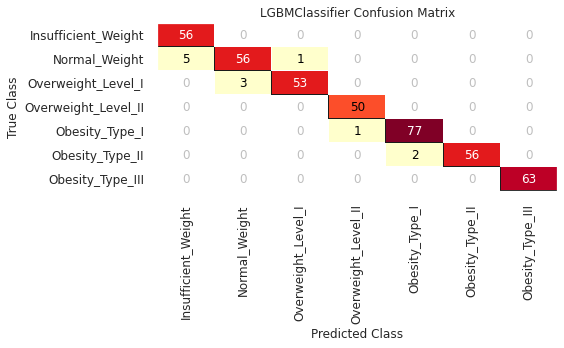

In [972]:
create_Confusion_Matrix(lgbm_class)

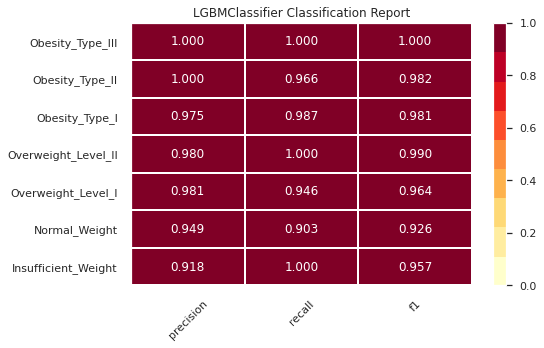

In [973]:
create_Classification_Report(lgbm_class)

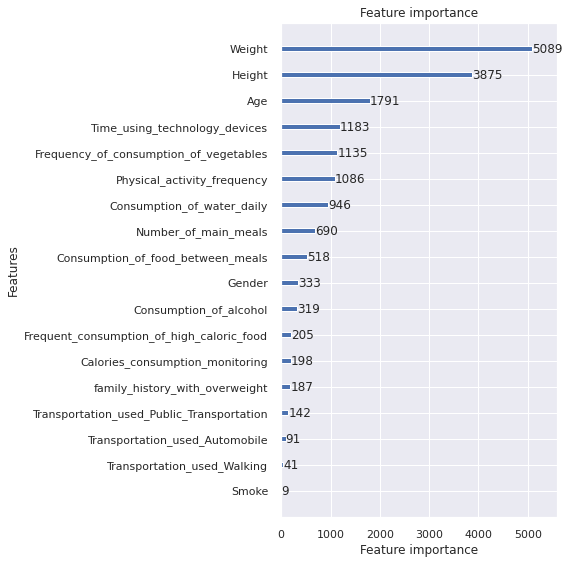

In [974]:
fig,ax=plt.subplots(figsize=(8,8))
lgb.plot_importance(lgbm_class,ax=ax)
fig.tight_layout()

In [975]:
accuracy_scores

[0.8888888888888888,
 0.8936170212765957,
 0.9385342789598109,
 0.9550827423167849,
 0.950354609929078,
 0.9716312056737588]

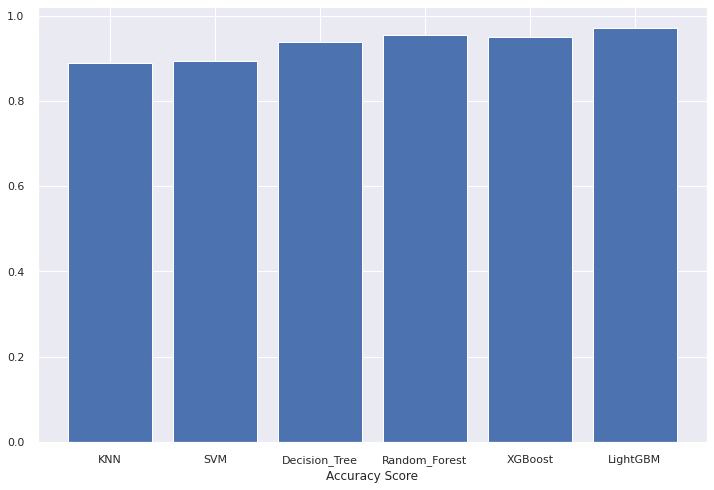

In [976]:
classifiers=["KNN","SVM","Decision_Tree","Random_Forest","XGBoost","LightGBM"]
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(classifiers,accuracy_scores)
plt.xlabel('Classifiers')
plt.xlabel('Accuracy Score')
plt.show()


The above plot tells us about the accuracy levels for each of the classifiers.

For BMI, Height, Weight and Age will be the most important attributes, but we are more interested in answering the important attributes which are depended on our regular lifestyle. Thus, we can conclude from the 4 different graphs that the key features towards indicating obesity from our lifestyle habits are: Time using Technology Devices, Frequency of Consumption of Vegetables, Consumption of Water Daily along with Weight, Height and Age. So along with high accuracy and identifying the key factors towards obesity, we were able to solve or first research question.

# 2. PREDICTING WEIGHT BASED ON DIET AND HABITS

Our 2nd Research Question aims at Estimating Weight of a person based on the dietary habits, family history with overweight and lifestyle of a person using Regression Models. So, we have not included Height, Obesity Level, Age and Gender of a person for this model. We have used 6 different Regression models: Linear, Ridge, Lasso (alpha = 0.1), Support Vector Machine, Decision Tree and Random Forest Regressors.

In [977]:
X=new_obesity_data[["family_history_with_overweight","Frequent consumption of high caloric food","Frequency of consumption of vegetables","Number of main meals","Consumption of food between meals","Smoke","Consumption of water daily","Calories consumption monitoring","Physical activity frequency","Time using technology devices","Consumption of alcohol","Transportation_used_Automobile","Transportation_used_Bike","Transportation_used_Motorbike","Transportation_used_Public_Transportation","Transportation_used_Walking"]]
y=new_obesity_data[["Weight"]]

In [978]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

reg_mses = []
r2_scores=[]

In [979]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print('Coefficients: ', lin_reg.coef_)
print('Variance score: {}'.format(lin_reg.score(X_test, y_test)))
y_pred=lin_reg.predict(X_test)
y_pred

Coefficients:  [[ 27.38595463  10.35602294   9.40343948   2.51386132 -10.30965108
    5.43902443   2.75579744 -12.52506151  -0.29673501  -2.17262786
    9.02792889  -5.53672652  12.05822568   1.91101974  -0.91230397
   -7.52021493]]
Variance score: 0.43574389270695835


array([[ 74.07171762],
       [107.38220841],
       [ 90.91319932],
       [ 60.6631663 ],
       [ 94.71136859],
       [ 90.11952916],
       [ 97.26433977],
       [ 93.98305516],
       [ 82.5637314 ],
       [ 74.83532119],
       [ 94.34196735],
       [106.18682274],
       [ 89.70007859],
       [ 93.05694635],
       [104.78613092],
       [ 62.74636584],
       [102.7878659 ],
       [ 88.32858398],
       [103.08797785],
       [ 84.67293424],
       [ 88.95420305],
       [ 86.44897986],
       [105.08042225],
       [ 87.82475753],
       [ 50.07208614],
       [ 93.05812976],
       [ 83.09095076],
       [103.8956499 ],
       [106.47890222],
       [ 87.01791046],
       [108.17241353],
       [ 89.5047234 ],
       [105.12146333],
       [ 86.75834025],
       [ 47.60508911],
       [105.9955904 ],
       [ 86.13556204],
       [ 43.50843551],
       [ 93.66001315],
       [ 53.81808659],
       [ 91.88920289],
       [ 91.83748018],
       [ 75.77855509],
       [ 56

In [980]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 397.86
Coefficient of determination: 0.44


In [981]:
ridge_reg = linear_model.Ridge()
ridge_reg.fit(X_train, y_train)
print('Coefficients: ', ridge_reg.coef_)
print('Variance score: {}'.format(ridge_reg.score(X_test, y_test)))
y_pred=ridge_reg.predict(X_test)
y_pred

Coefficients:  [[ 27.29402116  10.32377021   9.37801061   2.52017761 -10.29327654
    5.29363496   2.76723073 -12.3504806   -0.2979846   -2.18257677
    9.00030379  -4.96212527  10.01527123   2.17329021  -0.36023427
   -6.86620191]]
Variance score: 0.43710586832652476


array([[ 74.08216706],
       [107.34747777],
       [ 91.07455577],
       [ 60.70783533],
       [ 92.11330552],
       [ 90.08481853],
       [ 97.25392019],
       [ 93.95747764],
       [ 82.5640766 ],
       [ 74.85265388],
       [ 94.3594656 ],
       [106.14666356],
       [ 89.67461307],
       [ 93.04811568],
       [104.74072977],
       [ 62.77269795],
       [102.73401875],
       [ 88.30983032],
       [103.03473224],
       [ 84.71632126],
       [ 88.91119338],
       [ 86.43260998],
       [105.03588181],
       [ 87.84042965],
       [ 50.14223611],
       [ 93.0384579 ],
       [ 83.08539816],
       [103.84582359],
       [106.44027244],
       [ 87.02255431],
       [108.14121453],
       [ 89.51383888],
       [105.06396285],
       [ 86.77864498],
       [ 47.88909584],
       [105.95477767],
       [ 86.14442924],
       [ 43.59634202],
       [ 93.62686566],
       [ 53.88961856],
       [ 91.85462309],
       [ 91.83403684],
       [ 75.88009712],
       [ 56

In [982]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 396.90
Coefficient of determination: 0.44


Text(0.5, 1.0, 'Regression Coefficients for Lasso Paths')

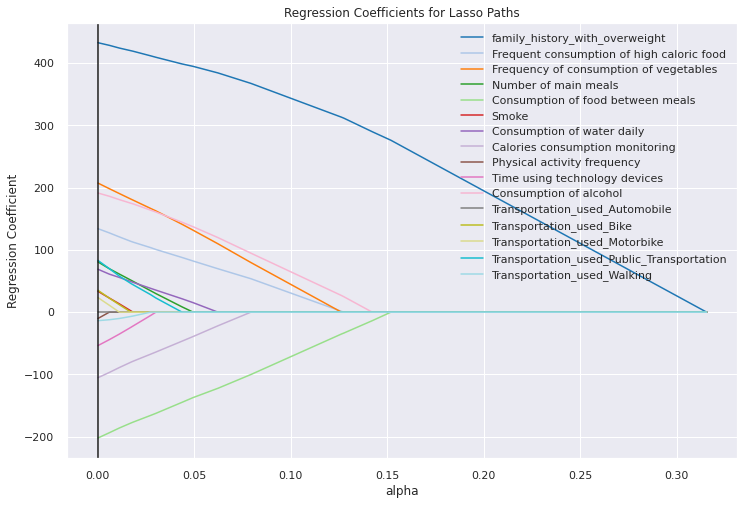

In [983]:
from sklearn import linear_model
model=linear_model.LassoLarsCV(cv=10,max_n_alphas=10).fit(X_train,np.ravel(y_train))
fig,ax=plt.subplots(figsize=(12,8))
cm=iter(plt.get_cmap("tab20")(np.linspace(0,1,X.shape[1])))
for i in range(X.shape[1]):
    c=next(cm)
    ax.plot(model.alphas_,model.coef_path_.T[:,i],c=c,alpha=1.0,label=X.columns[i])
ax.axvline(model.alpha_,linestyle="-",c="k",label="alphaCV")
plt.ylabel("Regression Coefficient")
ax.legend(X.columns)
plt.xlabel("alpha")
plt.title("Regression Coefficients for Lasso Paths")

In [984]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
print('Coefficients: ', lasso_reg.coef_)
print('Variance score: {}'.format(lasso_reg.score(X_test, y_test)))
y_pred=lasso_reg.predict(X_test)
y_pred

Coefficients:  [ 27.1650022    9.65325048   9.01292466   2.37564467  -9.93902772
   0.78279668   2.5581618  -10.00663122  -0.19994111  -2.01183267
   8.84206397  -0.           0.           0.           3.95397711
  -0.        ]
Variance score: 0.4404871894209227


array([ 74.68258228, 106.45575036,  93.31830274,  60.88966758,
        78.45938993,  90.16818307,  96.82435261,  93.73206217,
        82.61637157,  75.16534653,  94.47146687, 105.48306746,
        89.60828226,  93.38635197, 104.04666314,  63.54643924,
       102.25053085,  88.31043942, 102.61733516,  85.12058621,
        89.09492551,  87.08377438, 104.32577193,  87.60958234,
        50.76193288,  93.27385586,  83.34983448, 103.37341627,
       105.61997786,  87.01583017, 107.18793562,  90.16307879,
       105.11809947,  86.80783418,  50.5274933 , 105.19553823,
        86.0384529 ,  44.47723076,  93.35228825,  54.41625848,
        91.69114908,  91.72360525,  78.54295244,  57.47633264,
        92.38404131,  80.84932861,  88.88628905, 100.69830619,
        77.24158767,  99.19847639,  69.58976107,  75.01807978,
        64.78758787,  76.67118083,  93.21414619,  86.74469058,
        91.7799043 ,  97.98617784,  52.37743011,  86.90639958,
        56.39901072, 106.03007832,  93.2600727 ,  86.98

In [985]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 394.52
Coefficient of determination: 0.44


In [986]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,np.ravel(y_train))
print('Variance score: {}'.format(svr.score(X_test, y_test)))
y_pred=svr.predict(X_test)
y_pred

Variance score: 0.46202435789425544


array([ 64.26328109, 105.91560003,  83.03859597,  61.33375233,
        77.54045664,  86.66214658,  97.10336654,  89.22747801,
        77.62173821,  76.86703097,  93.86689614, 101.10003434,
        85.57345283,  93.5079177 , 102.16938938,  65.79537568,
        98.62928222,  83.03530971,  97.07566531,  82.10684994,
        85.14806059,  83.76162056, 104.38108976,  90.00330076,
        61.02567838,  87.30381684,  79.20453619,  97.66905193,
       105.68561503,  74.8953292 , 105.62371874,  86.62487904,
        91.5934847 ,  86.07168132,  67.74339577, 105.9913742 ,
        89.197707  ,  55.44860646,  92.72447874,  63.0649185 ,
        88.45332026,  88.17953618,  75.44493054,  66.54210429,
        89.92548014,  77.24482373,  89.48571915,  87.80818627,
        82.50359764,  94.72938708,  70.31700023,  68.64581673,
        63.00757777,  71.7095997 ,  79.73327328,  77.71885218,
        90.77014981,  95.86098414,  65.28550541,  82.28763333,
        63.38571386, 105.83405956,  90.88548706,  81.57

In [987]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 379.33
Coefficient of determination: 0.46


In [988]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, np.ravel(y_train))
print('Variance score: {}'.format(dtr.score(X_test, y_test)))
y_pred=dtr.predict(X_test)
y_pred

Variance score: 0.6241480697830017


array([ 57.        , 110.79263   ,  60.        ,  42.        ,
        53.783977  ,  50.157707  ,  78.025625  ,  75.        ,
        80.535698  ,  53.        ,  99.        , 150.51648   ,
        99.709329  , 119.117122  , 110.621723  ,  50.        ,
       125.117633  , 103.017623  , 105.131956  , 104.40682   ,
        91.363293  ,  51.121749  , 104.839068  , 109.207614  ,
        68.        , 105.131956  ,  80.005809  , 151.278532  ,
       107.218949  ,  54.98234   , 111.950113  ,  73.501233  ,
        85.687751  ,  79.863546  ,  45.        , 113.90506   ,
       109.207614  ,  70.5       ,  75.        ,  70.5       ,
        82.459577  , 113.207124  ,  67.        ,  66.5       ,
        64.4       ,  50.        , 104.321463  ,  79.469513  ,
        59.8       , 121.277832  ,  87.        ,  47.        ,
        56.        ,  70.        ,  59.990861  ,  73.        ,
        80.        , 119.081804  ,  87.668828  , 104.270062  ,
        57.        , 104.92057   ,  91.052215  ,  59.20

In [989]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 265.02
Coefficient of determination: 0.62


In [990]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, np.ravel(y_train))
print('Variance score: {}'.format(rfr.score(X_test, y_test)))
y_pred=rfr.predict(X_test)
y_pred

Variance score: 0.7802314106519077


array([ 62.45521565, 110.81997663,  62.71286261,  41.99557468,
        70.22812565,  58.7941795 ,  93.80979891,  85.85532714,
        79.65294131,  55.83566793,  94.79445852, 132.25245333,
       101.53114836, 110.03105924, 110.96166075,  61.16018981,
       124.82168496, 102.83676232, 120.17508335,  80.80277704,
        97.28030914,  73.16341634, 105.37628311,  95.44938235,
        59.91444236, 103.43467132,  82.02073911, 141.50579905,
       114.02089191,  57.89886194, 112.02408397,  76.21363405,
        84.97297976,  69.43009915,  49.22147401, 118.3059054 ,
        95.43966617,  80.65506282,  81.4709971 ,  68.89606282,
        81.5875717 , 113.82525701,  75.44859988,  72.44443016,
        69.92197315,  51.75278646, 100.97861455,  98.06862411,
        75.42861381, 104.58544788,  67.9967087 ,  69.62641946,
        52.50004667,  70.        ,  63.0270893 ,  74.90220484,
        86.74815629, 101.32293552,  71.5075292 , 103.04395563,
        53.01272064, 109.14998461,  92.94491973,  59.39

In [991]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

reg_mses.append(mean_squared_error(y_test, y_pred))
r2_scores.append(r2_score(y_test, y_pred))

Mean squared error: 154.96
Coefficient of determination: 0.78


[397.86315015642526, 396.90280625685006, 394.51859978585327, 379.3325068335626, 265.01730511327327, 154.9612350372944]
[0.43574389270695835, 0.43710586832652476, 0.4404871894209227, 0.46202435789425544, 0.6241480697830017, 0.7802314106519077]


<BarContainer object of 6 artists>

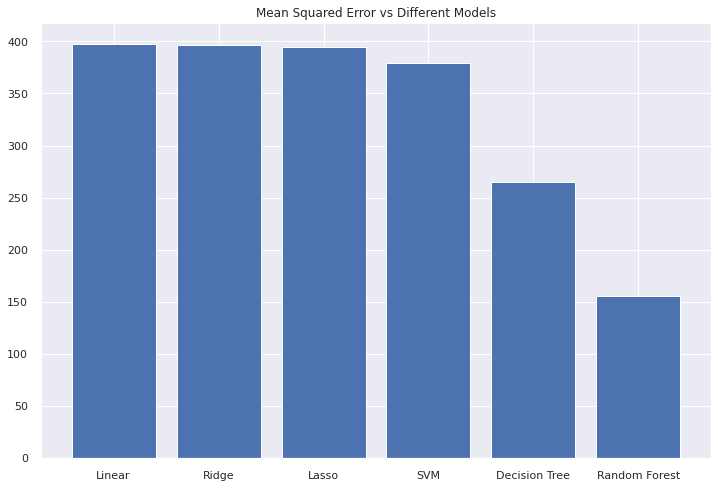

In [992]:
print(reg_mses)
print(r2_scores)
fig,ax=plt.subplots(figsize=(12,8))
ax.set_title("Mean Squared Error vs Different Models")
plt.bar(['Linear', 'Ridge', 'Lasso', 'SVM', 'Decision Tree', 'Random Forest'], reg_mses)

<BarContainer object of 6 artists>

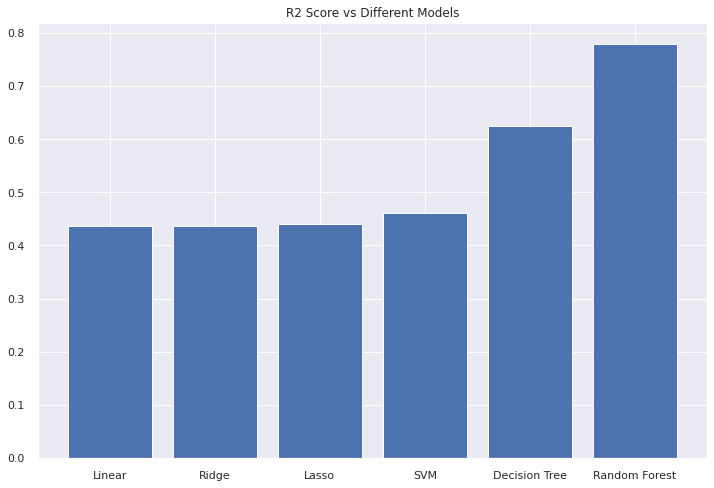

In [993]:
fig,ax=plt.subplots(figsize=(12,8))
ax.set_title("R2 Score vs Different Models")
plt.bar(['Linear', 'Ridge', 'Lasso', 'SVM', 'Decision Tree', 'Random Forest'],r2_scores)

After Training the dataset, we then estimate the Weight value using the above models. We have also plotted the Mean Squared Error for all the models, and it turns out that the MSE values for Linear, Ridge, Lasso and SVM is high (around 400) and for Decision Tree it reduces to around 260, and for Random Forest it is the lowest, giving 150. Also, we have plotted the regression coefficients for each of these regressors, and it turns out that it is the highest for Random Forest Regressor. Thus, to estimate the Weight of a person using his/her lifestyle habits, we use the Random Forest Regressor Model for high accuracy estimation.

# 3. RECOMMENDATION SYSTEM FOR DIFFERENT AGE GROUPS

Our 3rd Research Questions aims at recommending dietary and lifestyle habits for 3 different age groups: 14 to 21, 21 to 30 and 30+, based on Multiclass Classification and Feature-Importance’s, based on only the characteristics which are in our control, i.e., the features: Weight, Height, Age, Gender and Family History with Overweight have been removed from our dataset. So here we will simply be focusing on the attributes: Frequent consumption of high caloric food, Frequency of consumption of vegetables, Number of main meals, Consumption of food between meals, Smoke, Consumption of water daily, Calorie’s consumption monitoring, Physical activity frequency, Time using technology devices, Consumption of alcohol, Transportation used. 

In [994]:
X=new_obesity_data[["Age","Frequent consumption of high caloric food","Frequency of consumption of vegetables","Number of main meals","Consumption of food between meals","Smoke","Consumption of water daily","Calories consumption monitoring","Physical activity frequency","Time using technology devices","Consumption of alcohol","Transportation_used_Automobile","Transportation_used_Bike","Transportation_used_Motorbike","Transportation_used_Public_Transportation","Transportation_used_Walking","Obesity Level"]]
y=new_obesity_data[["Obesity Level"]]

In [995]:
age1=X.loc[(X["Age"] >= 14) & (X["Age"] <=21)]
age1_output=age1["Obesity Level"]
age1=age1.drop(columns=["Age","Obesity Level"])
age1

,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,0,2.0,3.0,1.0,0,2.000000,0,0.000000,1.000000,0.0,0,0,0,1,0
1,0,3.0,3.0,1.0,1,3.000000,1,3.000000,0.000000,1.0,0,0,0,1,0
11,1,2.0,3.0,2.0,0,2.000000,1,2.000000,1.000000,1.0,0,0,0,1,0
24,1,2.0,3.0,1.0,0,2.000000,0,0.000000,1.000000,1.0,0,0,0,1,0
25,0,2.0,4.0,2.0,1,2.000000,0,3.000000,2.000000,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,1,3.0,3.0,1.0,0,2.562002,0,1.976427,0.740331,1.0,0,0,0,1,0
2077,1,3.0,3.0,1.0,0,2.305574,0,1.734424,0.863043,1.0,0,0,0,1,0
2079,1,3.0,3.0,1.0,0,2.701960,0,1.465909,0.813235,1.0,0,0,0,1,0
2080,1,3.0,3.0,1.0,0,2.474518,0,1.560261,0.662489,1.0,0,0,0,1,0


In [996]:
X_train,X_test,y_train,y_test=train_test_split(age1,age1_output,test_size=0.2,random_state=42)

In [997]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [998]:
accuracy_scores=[]

In [999]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.6818181818181818

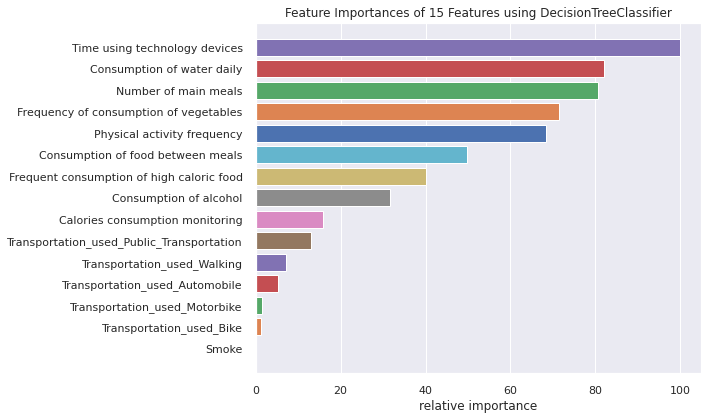

In [1000]:
feature_importance(dt,X_train,y_train)

In [1001]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,np.ravel(y_train))
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.7727272727272727

In [1002]:
imp=rfpimp.importances(rf,X_test,y_test)
imp

,Importance
Feature,
Frequency of consumption of vegetables,0.201299
Number of main meals,0.116883
Consumption of water daily,0.077922
Consumption of alcohol,0.077922
Consumption of food between meals,0.064935
Physical activity frequency,0.064935
Time using technology devices,0.058442
Calories consumption monitoring,0.032468
Frequent consumption of high caloric food,0.025974


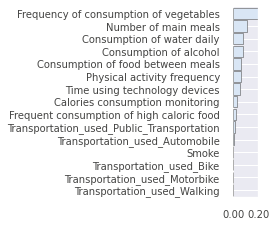

In [1003]:
from rfpimp import *
viz = plot_importances(imp)
viz.view()

In [1017]:
xgb_class=xgb.XGBClassifier(random_state=42)
xgb_class.fit(X_train,np.ravel(y_train),early_stopping_rounds=10,eval_set=[(X_test,y_test)],eval_metric="mlogloss")
y_pred=xgb_class.predict(X_test[:])
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

[0]	validation_0-mlogloss:1.55672
[1]	validation_0-mlogloss:1.32550
[2]	validation_0-mlogloss:1.16712
[3]	validation_0-mlogloss:1.05408
[4]	validation_0-mlogloss:0.97889
[5]	validation_0-mlogloss:0.91876
[6]	validation_0-mlogloss:0.87194
[7]	validation_0-mlogloss:0.84593
[8]	validation_0-mlogloss:0.82349
[9]	validation_0-mlogloss:0.80355
[10]	validation_0-mlogloss:0.78768
[11]	validation_0-mlogloss:0.78141
[12]	validation_0-mlogloss:0.77552
[13]	validation_0-mlogloss:0.76886
[14]	validation_0-mlogloss:0.76411
[15]	validation_0-mlogloss:0.76452
[16]	validation_0-mlogloss:0.76643
[17]	validation_0-mlogloss:0.77111
[18]	validation_0-mlogloss:0.77110
[19]	validation_0-mlogloss:0.77016
[20]	validation_0-mlogloss:0.76900
[21]	validation_0-mlogloss:0.77635
[22]	validation_0-mlogloss:0.77875
[23]	validation_0-mlogloss:0.78591


0.7792207792207793

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

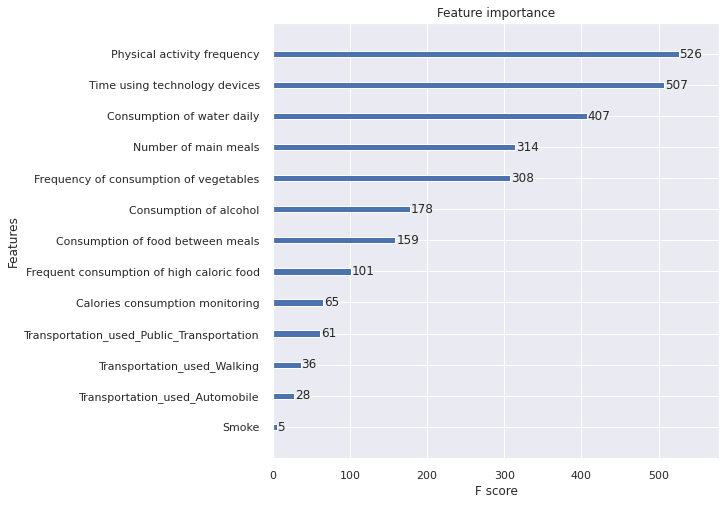

In [1005]:
fig,ax=plt.subplots(figsize=(8,8))
xgb.plot_importance(xgb_class,ax=ax)

In [1006]:
lgbm_class=lgb.LGBMClassifier(random_state=42,num_leaves=30)
lgbm_class.fit(X_train,np.ravel(y_train))
y_pred=lgbm_class.predict(X_test[:])
accuracy=accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
accuracy

0.7662337662337663

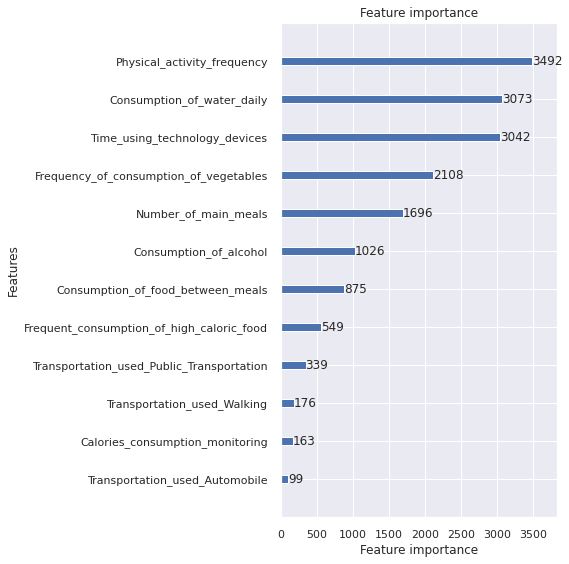

In [1007]:
fig,ax=plt.subplots(figsize=(8,8))
lgb.plot_importance(lgbm_class,ax=ax)
fig.tight_layout()

In [1008]:
accuracy_scores

[0.6818181818181818,
 0.7727272727272727,
 0.7792207792207793,
 0.7662337662337663]

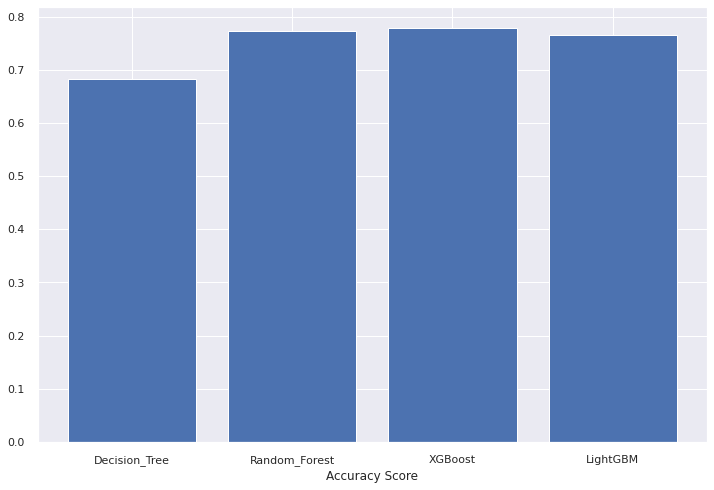

In [1009]:
classifiers=["Decision_Tree","Random_Forest","XGBoost","LightGBM"]
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(classifiers,accuracy_scores)
plt.xlabel('Classifiers')
plt.xlabel('Accuracy Score')
plt.show()

Initially we run the Accuracies and Feature-Importance’s for 4 classifiers: Decision Tree, Random Forest, XGBoost and LG Boost Machine learning algorithms, because these 4 classifiers gave higher accuracy in our previous models. This time we do not have the most important features: Height, Weight and Age, so our accuracy does decline a bit. We get highest accuracy for XGBoost algorithm with 77.9%, so we will be considering this classifier as the important one along with its feature-importance’s. With XGBoost algorithm, we found out that Physical Activity Frequency, Time using Technology Devices, Consumption of Water Daily, Number of Main Meals, Frequency of Consumption of vegetables and Consumption of Alcohol are the most important features for this classifier. So, our task now is to identify the ideal values for the above attributes for people with Normal Weight for all 3 age groups.

In [1010]:
age1_normal=X.loc[(X["Age"] >= 14) & (X["Age"] <21) & (X["Obesity Level"]==1.0)]
age1_normal=age1_normal.drop(columns=["Age","Obesity Level"])
age1_normal.reset_index(drop=True)

,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,0,2.0,4.0,2.0,1,2.0,0,3.0,2.0,0.0,0,0,0,1,0
1,1,3.0,3.0,1.0,0,2.0,1,3.0,1.0,1.0,0,0,0,1,0
2,0,3.0,3.0,1.0,0,2.0,0,1.0,0.0,1.0,0,0,0,0,1
3,1,2.0,3.0,1.0,0,1.0,0,0.0,0.0,1.0,1,0,0,0,0
4,1,3.0,1.0,1.0,0,2.0,0,1.0,1.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,2.0,1.0,1.0,0,1.0,0,0.0,2.0,0.0,0,0,0,1,0
128,1,2.0,3.0,2.0,0,1.0,0,2.0,0.0,1.0,0,0,1,0,0
129,1,3.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,0,0,0,1,0
130,1,3.0,1.0,3.0,0,1.0,1,0.0,0.0,0.0,0,0,1,0,0


In [1011]:
age2_normal=X.loc[(X["Age"] >=21 ) & (X["Age"] <30) & (X["Obesity Level"]==1.0)]
age2_normal=age2_normal.drop(columns=["Age","Obesity Level"])
age2_normal.reset_index(drop=True)

,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,0,0,0,1,0
1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,0,0,0,1,0
2,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,0,0,0,1,0
3,1,2.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,1,0,0,0,0
4,1,3.0,3.0,1.0,0,2.0,0,1.0,0.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,3.0,3.0,2.0,0,1.0,0,1.0,0.0,0.0,1,0,0,0,0
131,1,1.0,3.0,3.0,0,2.0,0,3.0,1.0,1.0,0,0,0,1,0
132,1,2.0,3.0,1.0,0,2.0,0,1.0,0.0,2.0,0,0,0,1,0
133,1,3.0,3.0,1.0,0,3.0,0,2.0,1.0,1.0,0,0,0,0,1


In [1012]:
age3_normal=X.loc[(X["Age"] >= 30) & (X["Obesity Level"]==1.0)]
age3_normal=age3_normal.drop(columns=["Age","Obesity Level"])
age3_normal.reset_index(drop=True)

,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation_used_Automobile,Transportation_used_Bike,Transportation_used_Motorbike,Transportation_used_Public_Transportation,Transportation_used_Walking
0,1,3.0,3.0,3.0,0,2.0,0,1.0,1.0,2.0,0,0,0,1,0
1,0,3.0,3.0,3.0,0,3.0,1,3.0,0.0,0.0,0,1,0,0,0
2,1,3.0,3.0,1.0,0,2.0,0,2.0,0.0,1.0,1,0,0,0,0
3,1,3.0,1.0,2.0,0,2.0,0,1.0,1.0,1.0,1,0,0,0,0
4,0,3.0,3.0,2.0,0,1.0,0,0.0,1.0,0.0,1,0,0,0,0
5,1,2.0,3.0,1.0,0,2.0,0,2.0,0.0,0.0,0,0,0,1,0
6,1,2.0,3.0,1.0,0,2.0,0,1.0,1.0,0.0,0,0,0,1,0
7,0,2.0,3.0,0.0,0,2.0,1,1.0,0.0,1.0,0,0,0,0,1
8,0,3.0,3.0,1.0,1,3.0,1,2.0,0.0,0.0,0,0,0,1,0
9,1,3.0,3.0,1.0,0,2.0,0,0.0,0.0,1.0,1,0,0,0,0


We have filtered out the 3 age groups into age1, age2 and age3 Data-Frames. After plotting the bar plots for each of the attributes, we are able to make certain conclusions on our research.

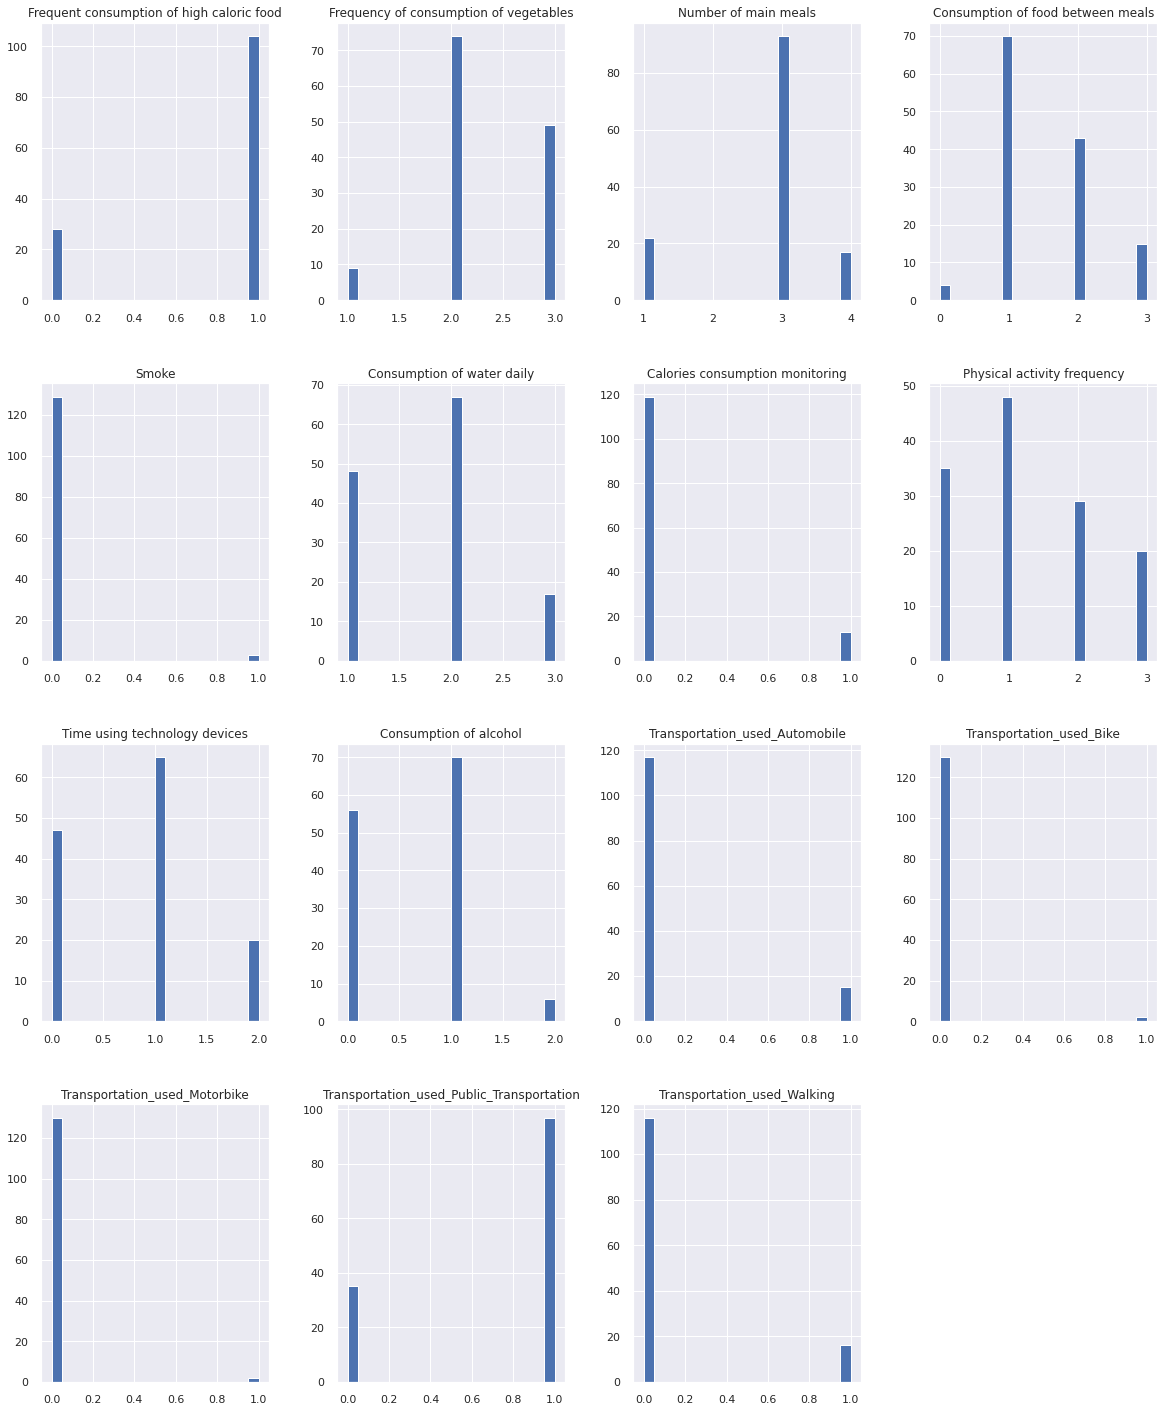

In [1013]:
age1_normal.hist(bins=20, figsize=(20,25))
plt.show()

For age group 14-21, we can observe that for Physical Activity Frequency, we have a maximum frequency of value as 1, i.e., a person of that group must often have 1 to 2 days of Physical activity. The time using technology devices has maximum frequency of value 1, i.e., a person of that age group can have an average of 3 to 5 hours of time on technology devices, but not more than that. Similarly, after analyzing all the plots, we can conclude that the Amount of Daily Water consumption must be at least 1 to 2 liters, Number of main meals must be 3, as lesser meals can lead to Insufficient Weight, Frequency of Consumption of vegetables must be in category of "Sometimes" and Consumption of Alcohol also comes under "Sometimes" category to maintain Normal Weight for age group 14 to 21.

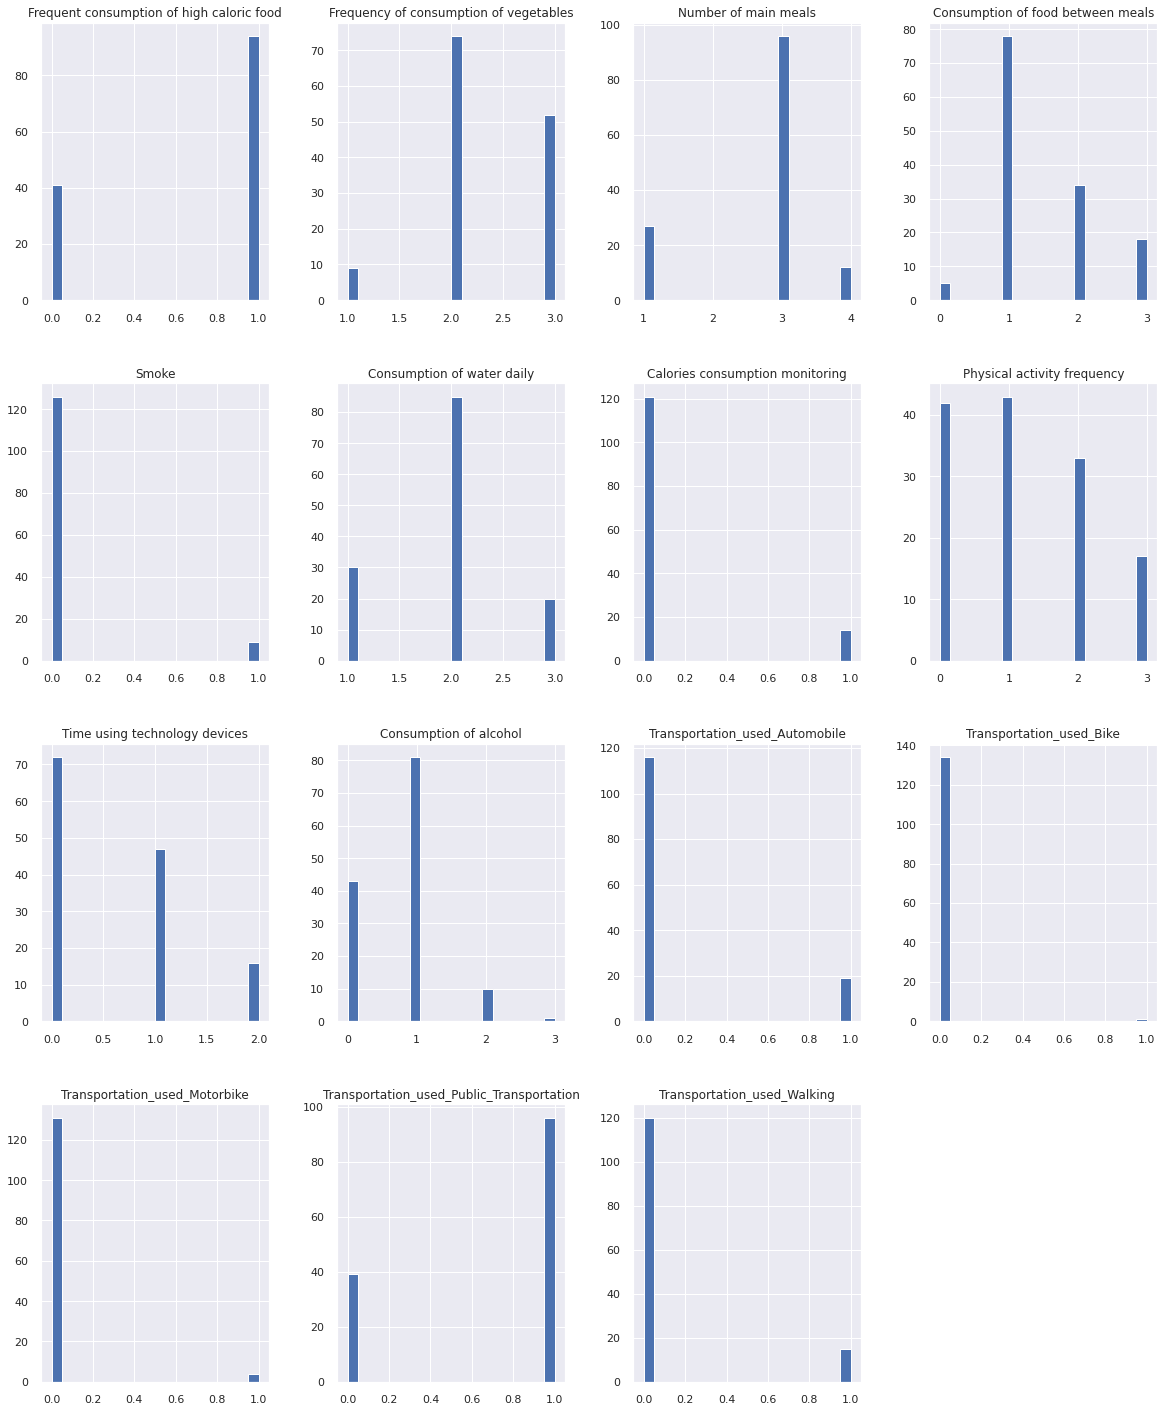

In [1014]:
age2_normal.hist(bins=20, figsize=(20,25))
plt.show()

For age group 21-30 group, they can have Physical Activity Frequency of None or 1 to 2 days, time using technology devices must be lesser than above age group, i.e., 0 to 2 hours, Amount of Daily Water consumption must be at least 1 to 2 liters, number of main meals must be 3, Frequency of Consumption of vegetables and Frequency of Consumption of Alcohol must be in category of "Sometimes". It can be noticed that all the values for the above 2 age groups are quite similar, because in general, this age group belongs to Teenagers and Young Adults.

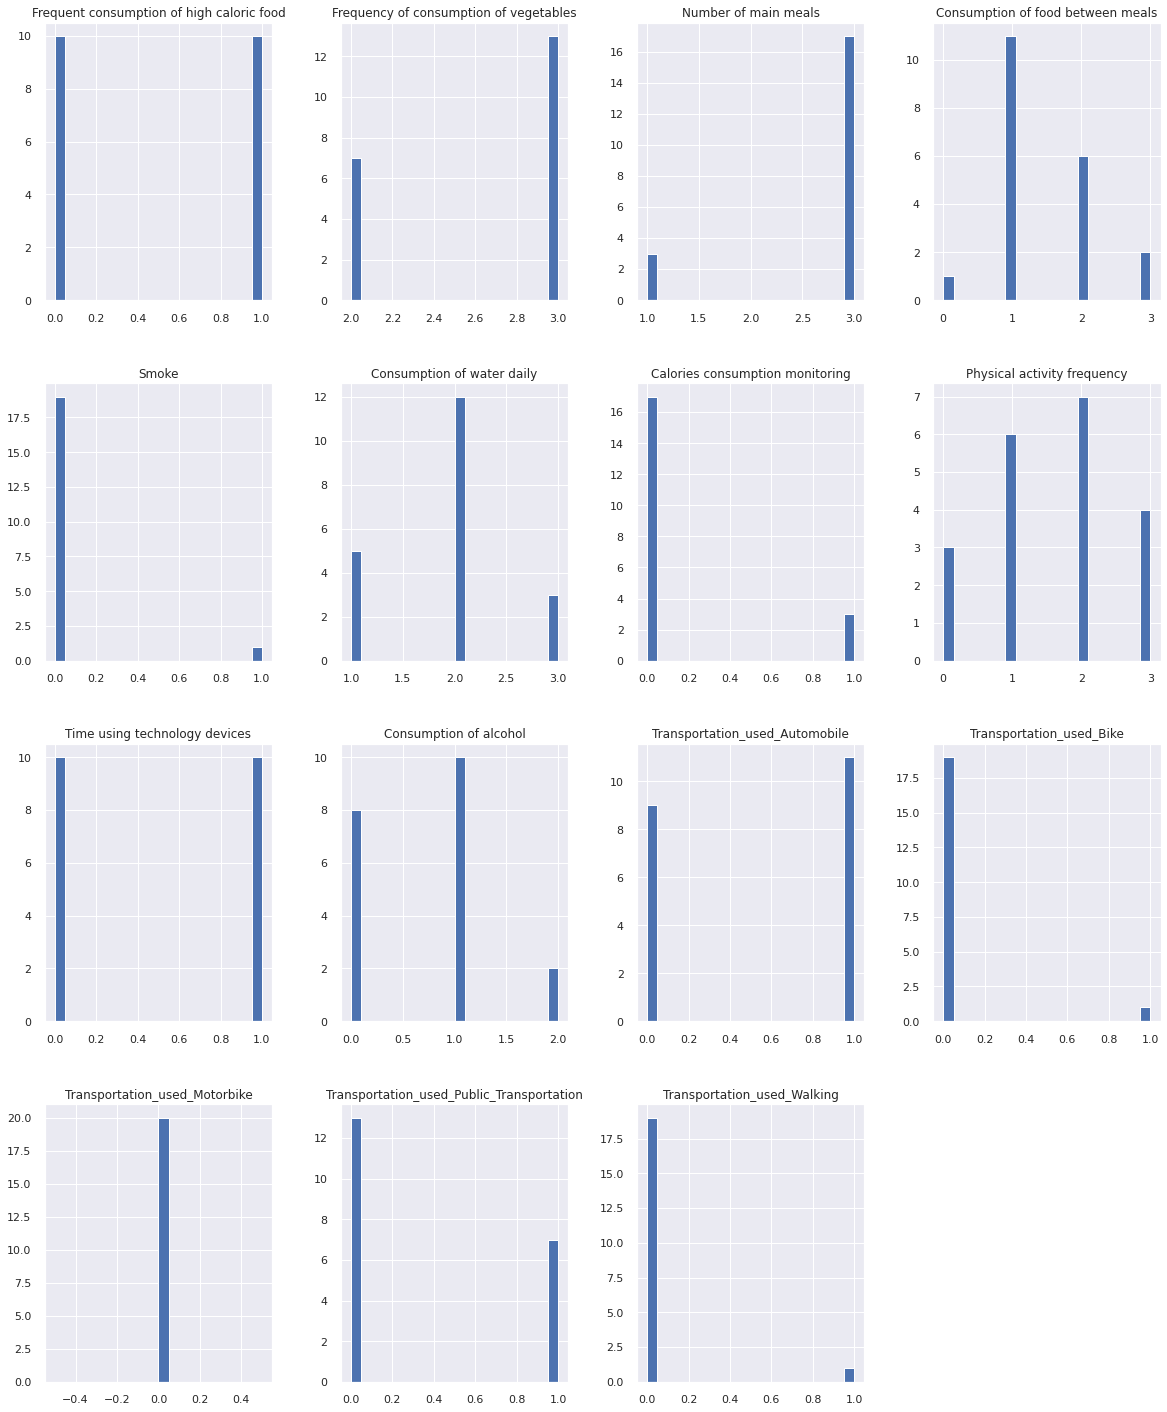

In [1015]:
age3_normal.hist(bins=20, figsize=(20,25))
plt.show()

For age Group above 30 years, the Physical Activity Frequency is higher, with value of 2 to 4 days, Time Using Technology Devices also reduces to 0 to 2 hours, Amount of Daily Water consumption must be at least 1 to 2 liters, number of main meals must be 3, Frequency of Consumption of vegetables increases to "Always", Frequency of Alcohol is "Sometimes". We can conclude that the Vegetable consumption increases along with the Physical Activity Frequency to maintain Normal Weight, whereas the Time using Technology Devices reduces to 0 to 2 hours.

We can also draw certain conclusions on other attributes, even though they don't show with high importance value on the Feature-importance graph. For smoking, in almost all cases we have value of No for Normal Weight, Consumption of Food between meals must be "Sometimes", Calorie Consumption Monitoring doesn't matter much, Smoking has been set for 0 for Normal Weight and Frequent Consumption of High Caloric Food can be allowed for age groups.

Thus we were successfully able to implement a health recommendation system for different age groups to maintain normal health.